# Introduction

In the fast-paced world of music streaming, the ability to predict the popularity and streaming success of songs can be a significant asset for music producers, marketers, and platform curators. This data science project leverages the vast and dynamic data available from Spotify, one of the leading music streaming services globally. The project is structured around two main datasets that capture unique aspects of music consumption and user preferences, providing a foundation to explore predictive modeling in a music-related context.

# Background

**Dataset Overview:**
- **Dataset 1: Spotify Tracks** - This dataset encompasses approximately 80,000 unique songs available on Spotify up until around 2021. Each track in this dataset comes with various attributes, including a 'popularity' score. This popularity score is influenced by the number of plays a track has received and how recent those plays are, making it a dynamic and timely reflection of a song's current popularity.
  
- **Dataset 2: Charting Tracks** - Comprising about 39,000 unique songs, this dataset focuses on tracks that have made it to Spotify's Top 200 charts. The primary variable of interest here is the 'streams' count, which directly measures the total number of times each track was played, offering a concrete metric of its success on the platform.

**Project Goals:**
1. **Predictive Modeling**: The initial phase of the project involves developing linear regression models to predict the 'popularity' variable for songs in Dataset 1 and the 'streams' variable for songs in Dataset 2. This approach will help understand the features that most strongly correlate with success in these two dimensions.
  
2. **Data Integration**: Post-prediction, the project aims to integrate both datasets to broaden the analysis framework. The integrated dataset will be used to identify common features that influence both popularity and number of streams.

This project not only aims to harness machine learning techniques to forecast music trends but also seeks to uncover deeper insights into the factors that drive song popularity and streaming success.

# Approach and Methodology

Our project begins with a thorough cleaning and exploratory data analysis (EDA) of both datasets to understand their characteristics and prepare them for integration. Our cleaning process involves several techniques:

- **Categorical Encoding**: Transforming categorical data into numerical formats suitable for modeling.
- **Duplicate Removal**: Eliminating redundant entries to ensure the uniqueness of data.
- **Log Transformations and Scaling (Standard and Min-Max)**: Normalizing data distributions and scaling features to treat them equally in subsequent analyses.
- **Binning**: Grouping continuous data into categories to simplify patterns and relationships.

These methods help us address null values and outliers, and facilitate the engineering of features based on their correlations with target variables.

During our EDA, we aim to produce insightful and meaningful visualizations alongside practical tools to deepen our understanding of the data. We utilize:
- **Correlation Heatmaps**: To identify relationships between different variables.
- **Plotly Charts**: For interactive data exploration.
- **Folium Maps**: To visualize geographical data distributions.

Our analysis incorporates a broad array of techniques covered in our course, including:
- **Pandas and Regex**: For data manipulation and cleaning.
- **'Join'**: To merge datasets effectively.
- **Unsupervised Models**: Such as K-Means clustering to identify inherent groupings within the data.
- **Supervised Models**: Specifically, linear regression to predict target variables.

This comprehensive approach ensures that we not only prepare our data effectively but also leverage a variety of analytical techniques to gain valuable insights, paving the way for accurate predictions and strategic decision-making.

# Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
from string import ascii_letters
import os
from wordcloud import WordCloud
import plotly.express as px

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading in Data

In [ ]:
# Create the kaggle directory and
!mkdir -p ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!kaggle datasets download -d yelexa/spotify200

Dataset URL: https://www.kaggle.com/datasets/yelexa/spotify200
License(s): unknown
 93% 173M/187M [00:01<00:00, 101MB/s]
100% 187M/187M [00:01<00:00, 108MB/s]


In [ ]:
# Unzip folder in Colab content folder
!unzip /content/spotify200.zip

Archive:  /content/spotify200.zip
  inflating: final.csv               


In [ ]:
# Read the csv file and save it to a dataframe
spotify200 = pd.read_csv('final.csv')

# Check out the first five rows
spotify200.head()

<ipython-input-7-39921ec0e853>:2: DtypeWarning: Columns (2,4,9,12,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,35) have mixed types. Specify dtype option on import or set low_memory=False.
  spotify200 = pd.read_csv('final.csv')


Unnamed: 0                                   uri rank  artist_names  \
0           0  spotify:track:2gpQi3hbcUAcEG8m2dlgfB    1  Paulo Londra   
1           1  spotify:track:2x8oBuYaObjqHqgGuIUZ0b    2           WOS   
2           2  spotify:track:2SJZdZ5DLtlRosJ2xHJJJa    3  Paulo Londra   
3           3  spotify:track:1O2pcBJGej0pmH2Y9XZMs6    5       Cris Mj   
4           4  spotify:track:1TpZKxGnHp37ohJRszTSiq    6        Emilia   

  artists_num artist_individual                              artist_id  \
0         1.0      Paulo Londra  spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z   
1         1.0               WOS  spotify:artist:5YCc6xS5Gpj3EkaYGdjyNK   
2         1.0      Paulo Londra  spotify:artist:3vQ0GE3mI0dAaxIMYe5g7z   
3         1.0           Cris Mj  spotify:artist:1Yj5Xey7kTwvZla8sqdsdE   
4         1.0            Emilia  spotify:artist:0AqlFI0tz2DsEoJlKSIiT9   

        artist_genre                                         artist_img  \
0  argentine hip hop  https://i.scdn.co/image/ab6761610000e5ebf796a9...   
1    argentine indie  https://i.scdn.co/image/ab6761610000e5eb75e151...   
2  argentine hip hop  https://i.scdn.co/image/ab6761610000e5ebf796a9...   
3     urbano chileno  https://i.scdn.co/image/ab6761610000e5eb8f4ebc...   
4      pop argentino  https://i.scdn.co/image/ab6761610000e5ebaf96d1...   

  collab  ... acousticness instrumentalness liveness valence    tempo  \
0      0  ...       0.0495              0.0   0.0658   0.557  173.935   
1      0  ...        0.724              0.0    0.134   0.262   81.956   
2      0  ...        0.241              0.0   0.0929   0.216  137.915   
3      0  ...       0.0924         0.000046   0.0534   0.832   96.018   
4      0  ...       0.0811         0.000063    0.101   0.501   95.066   

   duration    country         region language pivot  
0  178203.0  Argentina  South America  Spanish     0  
1  183547.0  Argentina  South America  Spanish     0  
2  204003.0  Argentina  South America  Spanish     0  
3  153750.0  Argentina  South America  Spanish     0  
4  133895.0  Argentina  South America  Spanish     0  

[5 rows x 36 columns]

In [ ]:
# Download dataset
!kaggle datasets download -d maharshipandya/-spotify-tracks-dataset

Dataset URL: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
License(s): ODbL-1.0
 61% 5.00M/8.17M [00:00<00:00, 24.4MB/s]
100% 8.17M/8.17M [00:00<00:00, 35.8MB/s]


In [ ]:
# Unzip folder in Colab content folder
!unzip /content/-spotify-tracks-dataset.zip

Archive:  /content/-spotify-tracks-dataset.zip
  inflating: dataset.csv             


In [ ]:
# Read the csv file and save it to a dataframe
spotify_df = pd.read_csv('dataset.csv')

# Check out the first five rows
spotify_df.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

# EDA for the Spotify Tracks dataset

In the EDA for this dataset we hope to explore the general landscape using histograms and boxplots, the genre feature, artist popularity, popularity by genre, and correlations between features. The goal is to better understand how popularity can be predicted by the other features present.

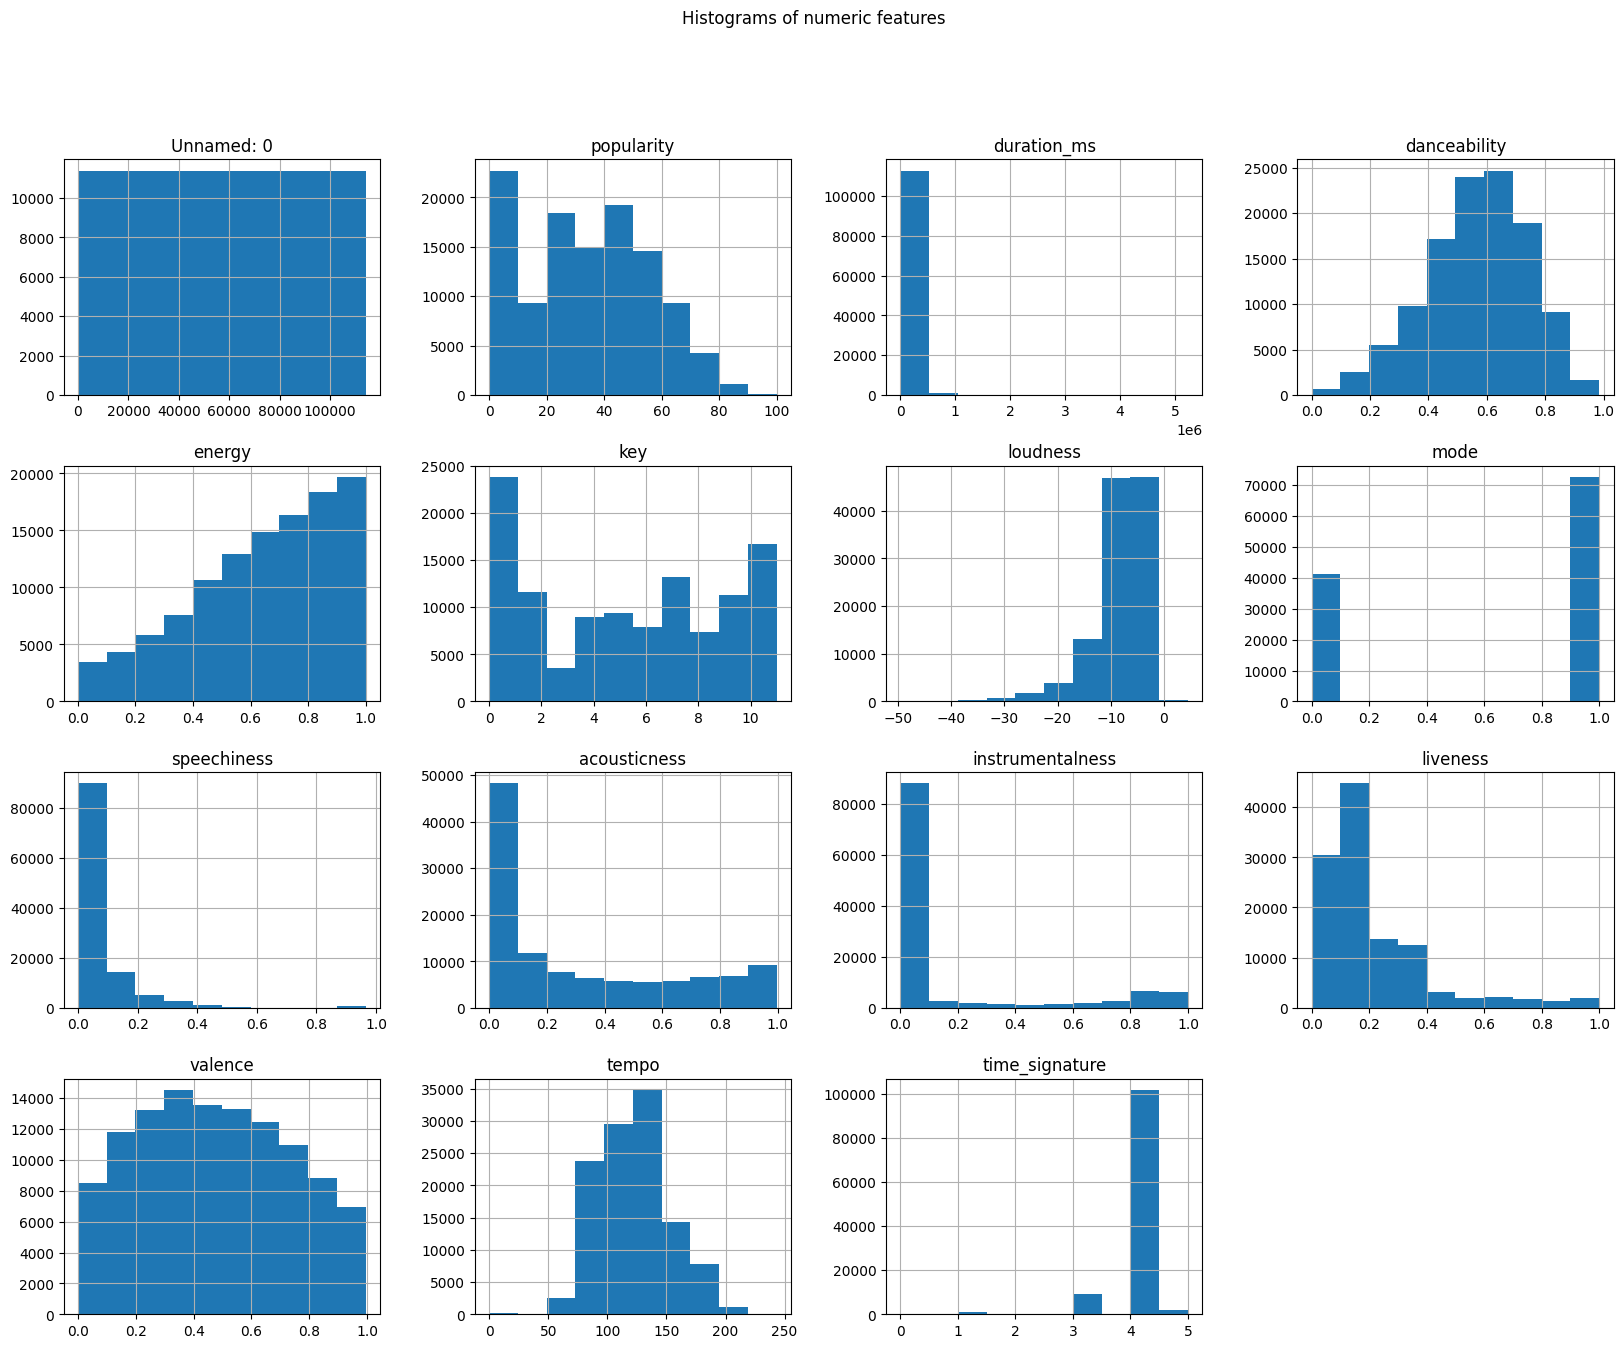

In [ ]:
spotify_df.hist(figsize=(20, 15))
plt.suptitle('Histograms of numeric features')
plt.show()

In [ ]:
numerical_features = ['popularity','duration_ms','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature']

Almost all of our features in the dataset are numerical, so we can analyze the distribution of these features first. We will also plot the boxplots to check for any significant outliers.

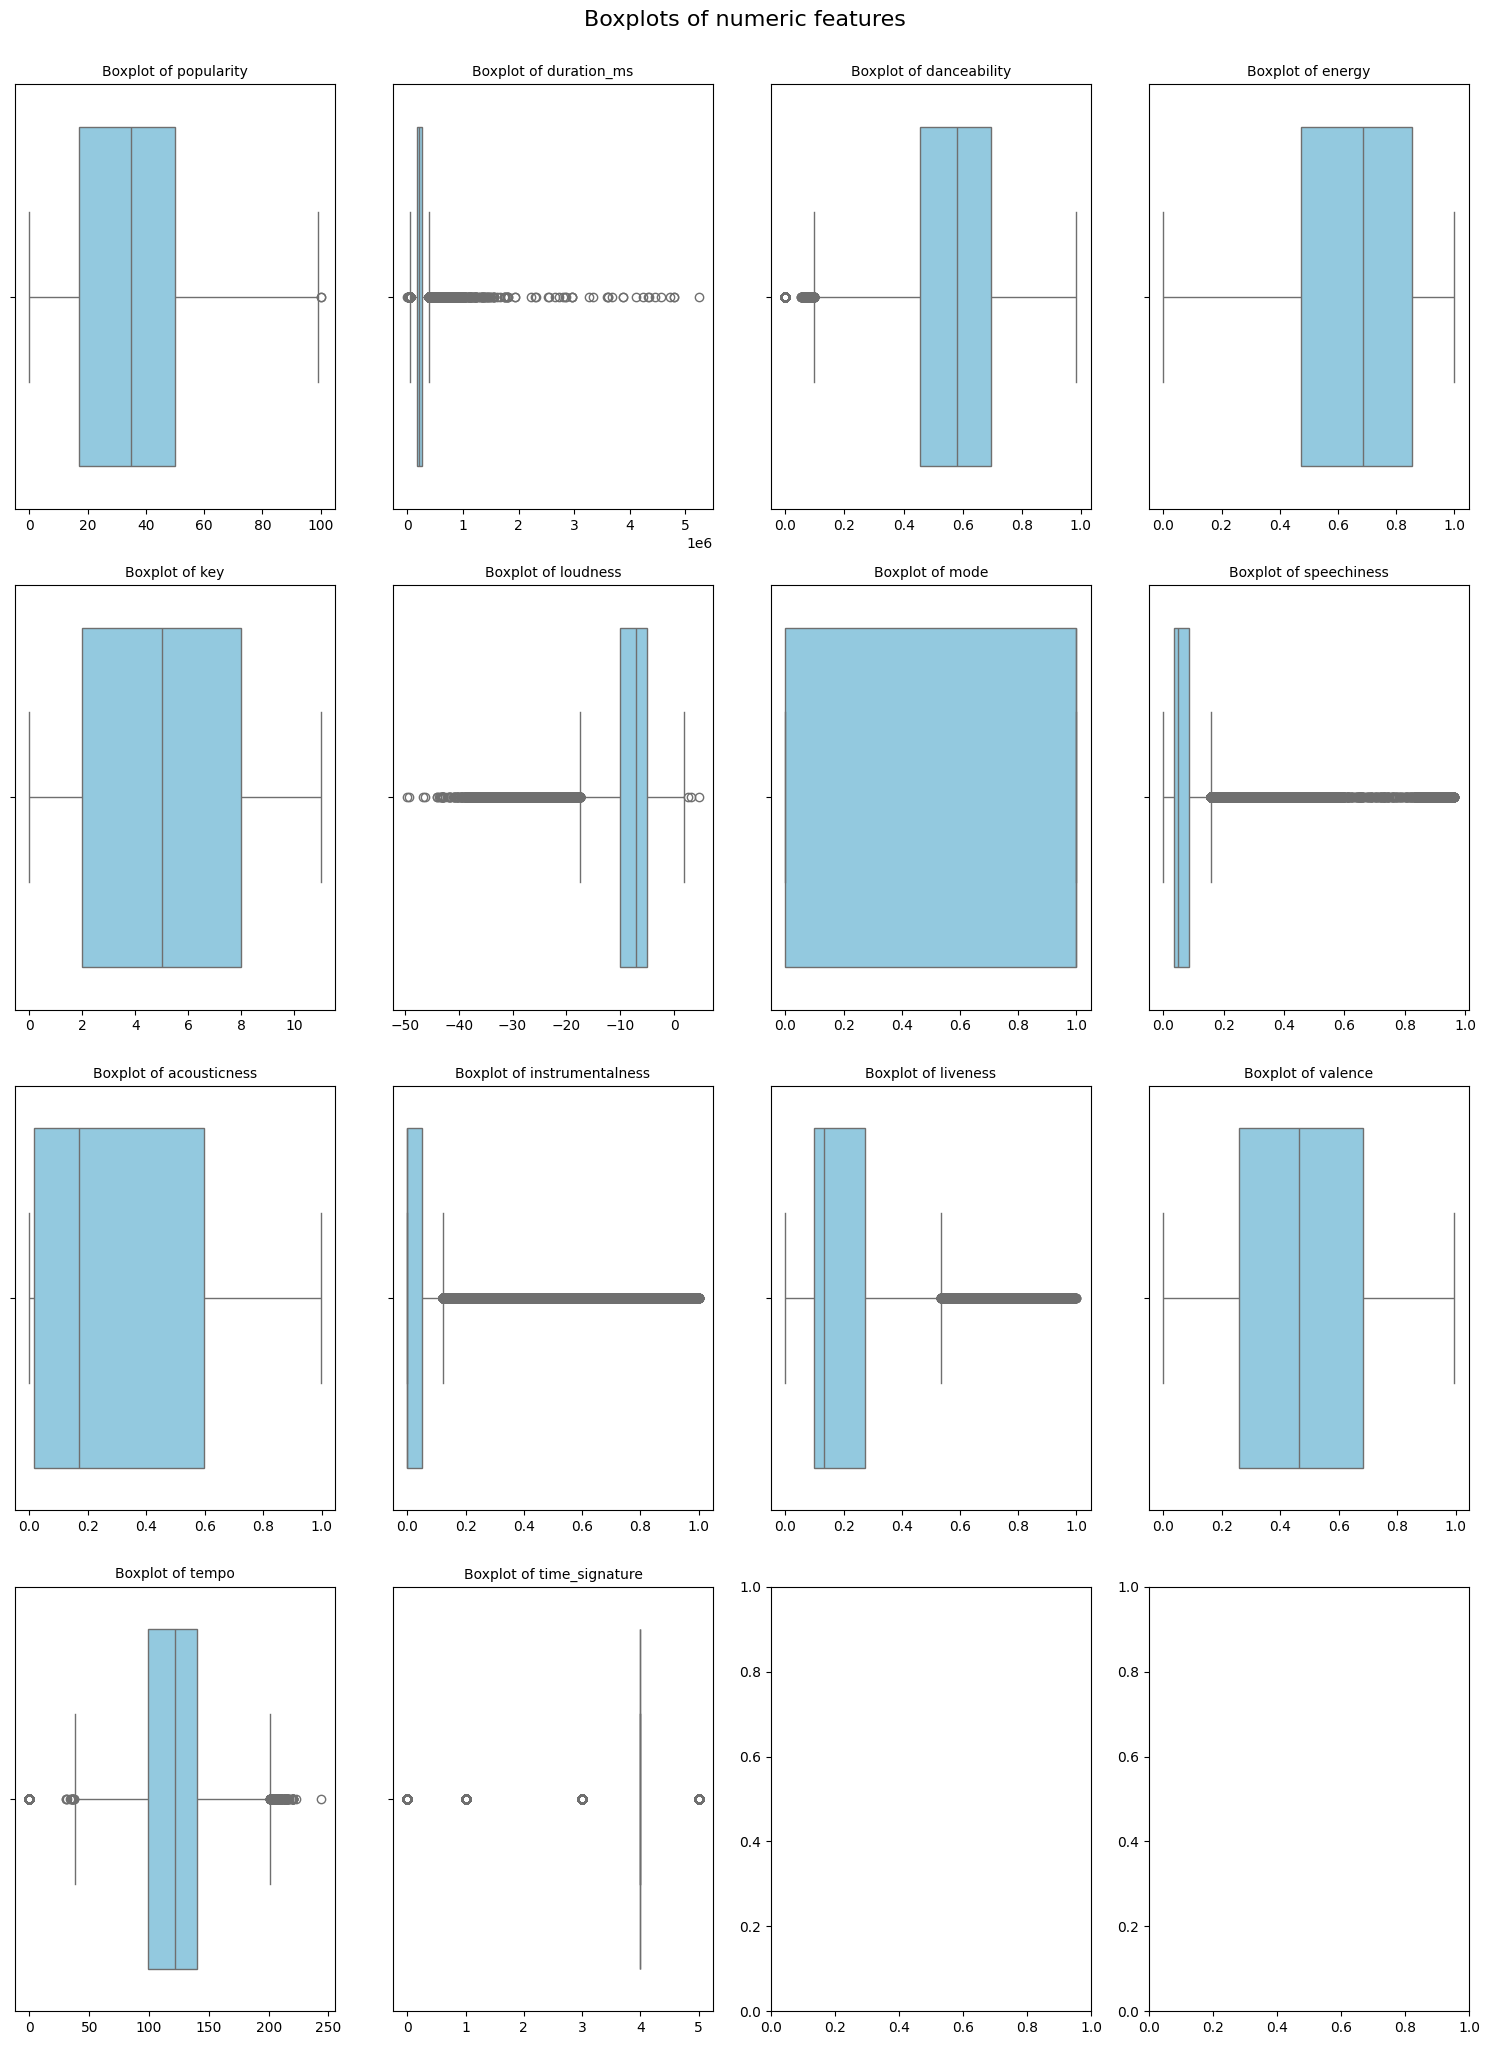

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 20))
axes = axes.flatten()
for i, c in enumerate(numerical_features):
    sns.boxplot(x=spotify_df[c], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {c}', fontsize=10)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.suptitle('Boxplots of numeric features', fontsize=16, y=1.02)
plt.show()

In [ ]:
Most outliers seem relatively insignificant, given the small scale of the features. To analyze the genre feature, we can first make a WordCloud to analyze what genres are present.

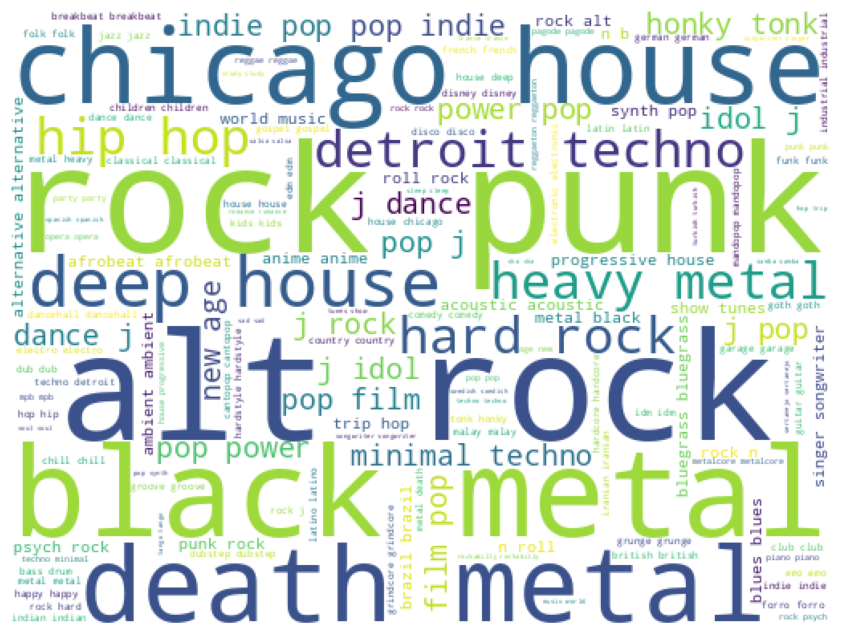

In [ ]:
plt.subplots(figsize = (20,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(spotify_df["track_genre"]))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

We can then group by the categorical features: artists and genre, and plot the average popularity of each group.

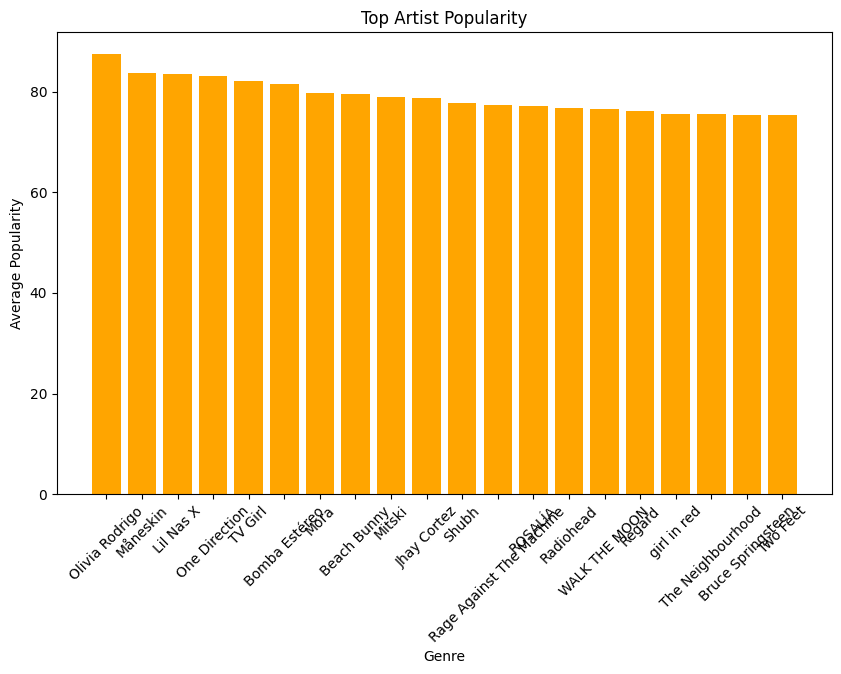

In [ ]:
#popularity for popular artists
spotify_artists =spotify_df.copy()
spotify_artists['artists'] = spotify_artists['artists'].apply(lambda x: x.split(';') if isinstance(x, str) else x)
spotify_artists = spotify_artists.explode('artists') #get separate rows for each artist on a song
spotify_artists_df = spotify_artists[spotify_artists.groupby('artists')['popularity'].transform('size') >= 5].reset_index() #filter only for artists with at least 5 songs


spotify_artists_df = spotify_artists_df.groupby('artists').mean('popularity').reset_index()
spotify_artists_df = spotify_artists_df.sort_values(by = 'popularity', ascending = False)
spotify_artists_df = spotify_artists_df.head(20) #plot only the top 20 popular artists

plt.figure(figsize=(10, 6))
plt.bar(spotify_artists_df['artists'], spotify_artists_df['popularity'], color = 'orange')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Top Artist Popularity')
plt.xticks(rotation=45)
plt.show()
# spotify_artists_df

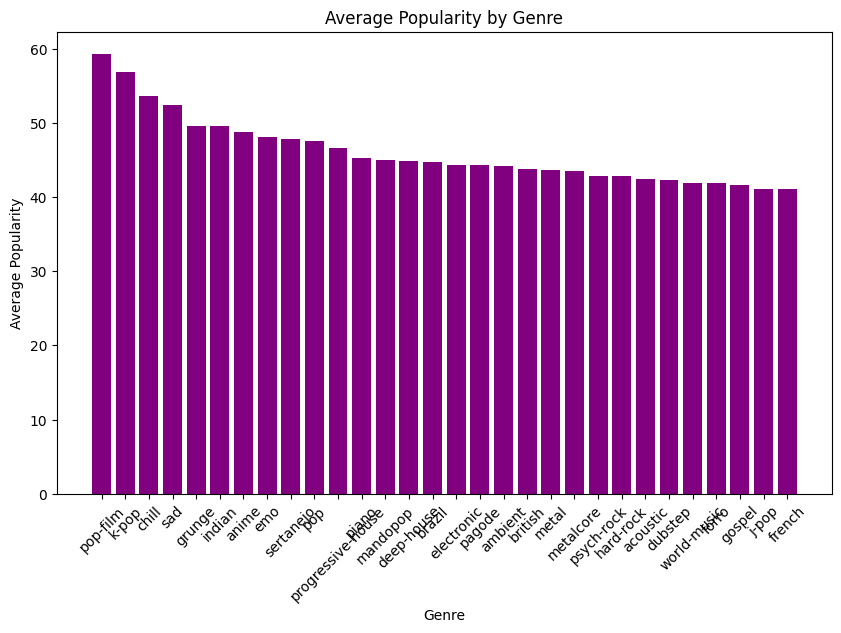

In [ ]:
#popularity per genre
spotify_grouped_df = spotify_df.groupby('track_genre').mean('popularity').reset_index()
spotify_grouped_df = spotify_grouped_df.sort_values(by = 'popularity', ascending = False)
spotify_grouped_df = spotify_grouped_df.head(30) #plot only the top 20 genres

plt.figure(figsize=(10, 6))
plt.bar(spotify_grouped_df['track_genre'], spotify_grouped_df['popularity'], color = 'purple')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Genre')
plt.xticks(rotation=45)
plt.show()

# spotify_grouped_df

Our initial hypothesis is that danceability may be a top feature, so we can plot the most popular genres, then add a third axis for danceability with plotly. The plot does seem to indicate a general trend of higher danceability in the most popular genres.


In [ ]:
#popularity per genre with danceability as color
fig = px.bar(spotify_grouped_df, x='track_genre', y='popularity',
             hover_data=['danceability', 'energy'], color='danceability',
             labels = {'track_genre':'genre'},height=400)
fig.show()

Finally, to analyze the correlation of all features, we can make a correlation heatmap with seaborn. There doesn't seem to be any very correlated features with popularity or with each other.

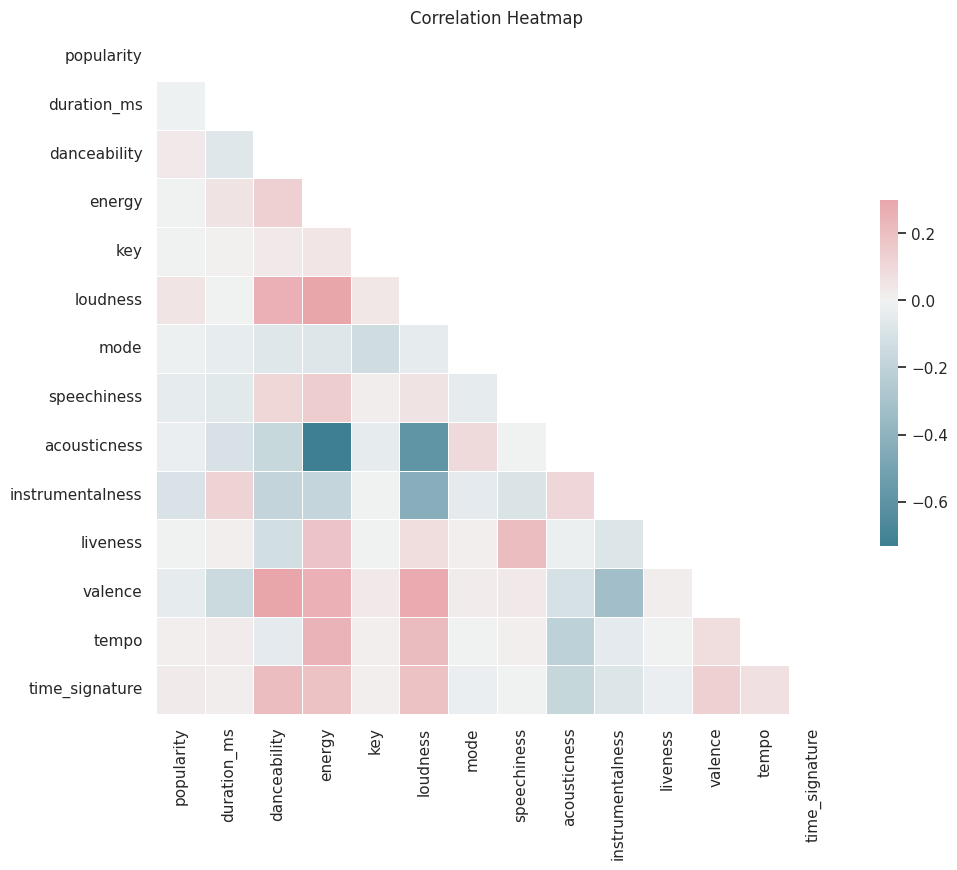

In [ ]:
#correlation matrix
#code from homework 1
spotify_numerical = spotify_df[numerical_features]
correlation_matrix = spotify_numerical.corr()

sns.set(style = "white")

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap")
plt.show()

# Data Cleaning for the Spotify 200 Charts dataset

The very initial cleaning for this dataset includes fixing datatypes, dropping duplicates, selecting columns of interest, categorical encoding, and dropping null values. We execute all these operations so that our dataset is prepared to be used for modeling.

In [ ]:
# Regular expression to match the date format YYYY-MM-DD
pattern = r'^\d{4}-\d{2}-\d{2}$'

# Check if dates match the format
matches = spotify200['release_date'].str.match(pattern)

spotify200 = spotify200[matches]
spotify200.shape

(1770563, 36)

In [ ]:
spotify200.drop_duplicates(inplace=True)
spotify200 = spotify200.drop(['Unnamed: 0', 'artist_img', 'album_cover'], axis=1)

In [ ]:
# for one-hot categorical encoding
spotify200['region'].unique()

array(['South America', 'Oceania', 'Europe', 'North America',
       'Central America', 'Caribbean', 'Middle East', 'Global', 'Asia',
       'Africa'], dtype=object)

In [ ]:
spotify200 = spotify200.drop(spotify200[spotify200['rank']=='rank'].index)
spotify200['release_date'] = pd.to_datetime(spotify200['release_date'], format='mixed')
spotify200['week'] = pd.to_datetime(spotify200['week'])

In [ ]:
columns_to_convert = ['rank', 'artists_num', 'collab', 'weeks_on_chart', 'streams', 'album_num_tracks', 'peak_rank', 'previous_rank',
                      'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                      'danceability', 'energy', 'key', 'mode', 'liveness', 'valence', 'tempo', 'duration', 'pivot']
spotify200[columns_to_convert] = spotify200[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
columns_to_convert = ['artist_names', 'artist_individual', 'artist_id', 'artist_genre', 'track_name',
                      'source', 'country', 'region', 'language']

spotify200[columns_to_convert] = spotify200[columns_to_convert].apply(lambda x: x.astype(str))

In [ ]:
# removing duplicate songs by pivot (when multiple artists are split into separate rows, this value takes 0 for the first artist and 1 for the rest)
spotify200 = spotify200.drop(spotify200[spotify200['pivot']==1].index)
spotify200 = spotify200.drop(['pivot'], axis=1)

In [ ]:
# removing duplicate songs by artist name and track name (keeping the one where streams is the highest)
idx = spotify200.groupby(['artist_individual', 'track_name'])['streams'].idxmax()
spotify200 = spotify200.loc[idx]

In [ ]:
print("Unique counts for categorical features:")
for col in spotify200.select_dtypes(include=['object']).columns:
    print(f"{col}: {spotify200[col].nunique()} unique values")

Unique counts for categorical features:
uri: 34459 unique values
artist_names: 19101 unique values
artist_individual: 9662 unique values
artist_id: 9705 unique values
artist_genre: 1370 unique values
track_name: 32298 unique values
source: 6476 unique values
country: 74 unique values
region: 10 unique values
language: 40 unique values


In [ ]:
print("Missing values per column:")
missing_values = spotify200.isnull().sum()
print(missing_values[missing_values > 0])

Missing values per column:
danceability        8
energy              8
key                 8
mode                8
loudness            8
speechiness         8
acousticness        8
instrumentalness    8
liveness            8
valence             8
tempo               8
duration            8
dtype: int64


In [ ]:
spotify200.dropna(inplace=True)
spotify200.shape

(34456, 32)

In [ ]:
spotify200['release_date'].describe()

count                            34456
mean     2019-12-24 10:09:47.601579008
min                1920-06-20 00:00:00
25%                2020-06-15 00:00:00
50%                2021-05-21 00:00:00
75%                2021-12-10 00:00:00
max                2022-07-14 00:00:00
Name: release_date, dtype: object

In [ ]:
spotify200 = spotify200[spotify200['release_date'] >= '2018-01-01']
spotify200.shape

(30402, 32)

In [ ]:
spotify200 = pd.get_dummies(spotify200, columns=['region'])
spotify200.columns = [col.replace('region_', '').replace(' ', '_').lower() for col in spotify200.columns]
spotify200.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30402 entries, 19409 to 1586842
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   uri                30402 non-null  object        
 1   rank               30402 non-null  int64         
 2   artist_names       30402 non-null  object        
 3   artists_num        30402 non-null  float64       
 4   artist_individual  30402 non-null  object        
 5   artist_id          30402 non-null  object        
 6   artist_genre       30402 non-null  object        
 7   collab             30402 non-null  int64         
 8   track_name         30402 non-null  object        
 9   release_date       30402 non-null  datetime64[ns]
 10  album_num_tracks   30402 non-null  float64       
 11  source             30402 non-null  object        
 12  peak_rank          30402 non-null  int64         
 13  previous_rank      30402 non-null  int64         
 14  weeks

**Scaling**

Different features have different ranges. For example, 'streams' range up to \(10^7\) while features like 'danceability' and 'acousticness' range from 0 to 1. Scaling these features to a common scale could help improve the performance of machine learning models.

- **Standard Scaling:** Use z-score normalization to scale features with relatively normal distributions.
- **Min-Max Scaling:** For features that need to maintain their bounded range, use Min-Max scaling to transform features to a 0-1 scale.

**Binning**

For features with wide ranges or outliers, binning can convert numerical data into categorical-like data, which might reveal relationships in a more digestible form.

- **Fixed-Width Binning:** Convert features like 'duration' or 'tempo' into categorical bins (e.g., short, medium, long).
- **Quantile Binning:** This could be particularly useful for highly skewed features, ensuring each bin has the same number of observations.

**Feature Creation**

Combining features or creating new ones might reveal more about how various aspects relate to 'streams'.

- **Interaction Terms:** For features that are related (e.g., 'acousticness' and 'loudness'), create interaction terms to see if their combined effect has a linear relationship with 'streams'.
- **Polynomial Features:** Generate polynomial and interaction features, particularly for features that do not have a straightforward linear relationship with 'streams'.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard scaling
scaler = StandardScaler()
spotify200['duration_scaled'] = scaler.fit_transform(spotify200[['duration']])

# Min-Max scaling
min_max_scaler = MinMaxScaler()
spotify200['loudness_scaled'] = min_max_scaler.fit_transform(spotify200[['loudness']])

To eliminate outliers, let's get rid of songs that are not slow/moderate/fast tempo and over 6min long.

In [ ]:
# Defining bins for 'tempo'
tempo_bins = [0, 60, 120, 180, 240, 300, 360]
tempo_labels = ['Very Slow', 'Slow', 'Moderate', 'Fast', 'Very Fast', 'Extreme']
spotify200['tempo_binned'] = pd.cut(spotify200['tempo'], bins=tempo_bins, labels=tempo_labels)

# Defining bins for 'duration' in milliseconds
duration_bins = [0, 180000, 240000, 300000, 360000, 420000, 480000, np.inf]  # np.inf for durations longer than 480000 ms
duration_labels = ['0-3 min', '3-4 min', '4-5 min', '5-6 min', '6-7 min', '7-8 min', '>8 min']
spotify200['duration_binned'] = pd.cut(spotify200['duration'], bins=duration_bins, labels=duration_labels)

print(spotify200[['tempo', 'tempo_binned', 'duration', 'duration_binned']])

           tempo tempo_binned  duration duration_binned
19409    180.143         Fast  139431.0         0-3 min
627867   157.148     Moderate  171453.0         0-3 min
987537    79.975         Slow  120000.0         0-3 min
1758064   94.528         Slow  183983.0         3-4 min
557401   134.023     Moderate  188200.0         3-4 min
...          ...          ...       ...             ...
1590098  173.972     Moderate  238667.0         3-4 min
1589688  125.054     Moderate  254130.0         4-5 min
1590455   94.552         Slow  302062.0         5-6 min
756622   135.969     Moderate  226681.0         3-4 min
1586842  167.874     Moderate  207857.0         3-4 min

[30402 rows x 4 columns]


In [ ]:
spotify200['tempo_binned'].value_counts()

tempo_binned
Moderate     14859
Slow         14703
Fast           813
Very Slow       27
Very Fast        0
Extreme          0
Name: count, dtype: int64

In [ ]:
spotify200['duration_binned'].value_counts()

duration_binned
3-4 min    13678
0-3 min    12287
4-5 min     3322
5-6 min      685
6-7 min      245
7-8 min      100
>8 min        85
Name: count, dtype: int64

In [ ]:
desired_tempo_bins = ['Slow', 'Moderate', 'Fast']
filtered_tempo = spotify200['tempo_binned'].isin(desired_tempo_bins)

# Filter out songs longer than 7 minutes
filtered_duration = spotify200['duration'] <= 420000

# Apply both filters
spotify200 = spotify200[filtered_tempo & filtered_duration]
spotify200.shape

(30190, 45)

In [ ]:
spotify200.to_csv('spotify200.csv', index=False)
!cp spotify200.csv "drive/My Drive/"

# EDA for the Spotify 200 Charts dataset

The EDA for this dataset is focused on feature analysis and engineering to determine the best potential predictors of the number of streams on charting songs. The use of the PolynomialFeatures library allowed us to qualify the various interactions between certain features, and add them to our dataset. Additionally, charting data is heavily based on location, which is why we went through categorical encoding by region and generated plots for top genres weekly per country and the map for streams per country chart annually. Finally, we cluster on the numerical Spotify API features per song to unfortunately observe no distinct clusters, but rather an overwhelmingly even distribution of songs across all combinations of those features.

In [ ]:
spotify200 = pd.read_csv('drive/My Drive/spotify200.csv')

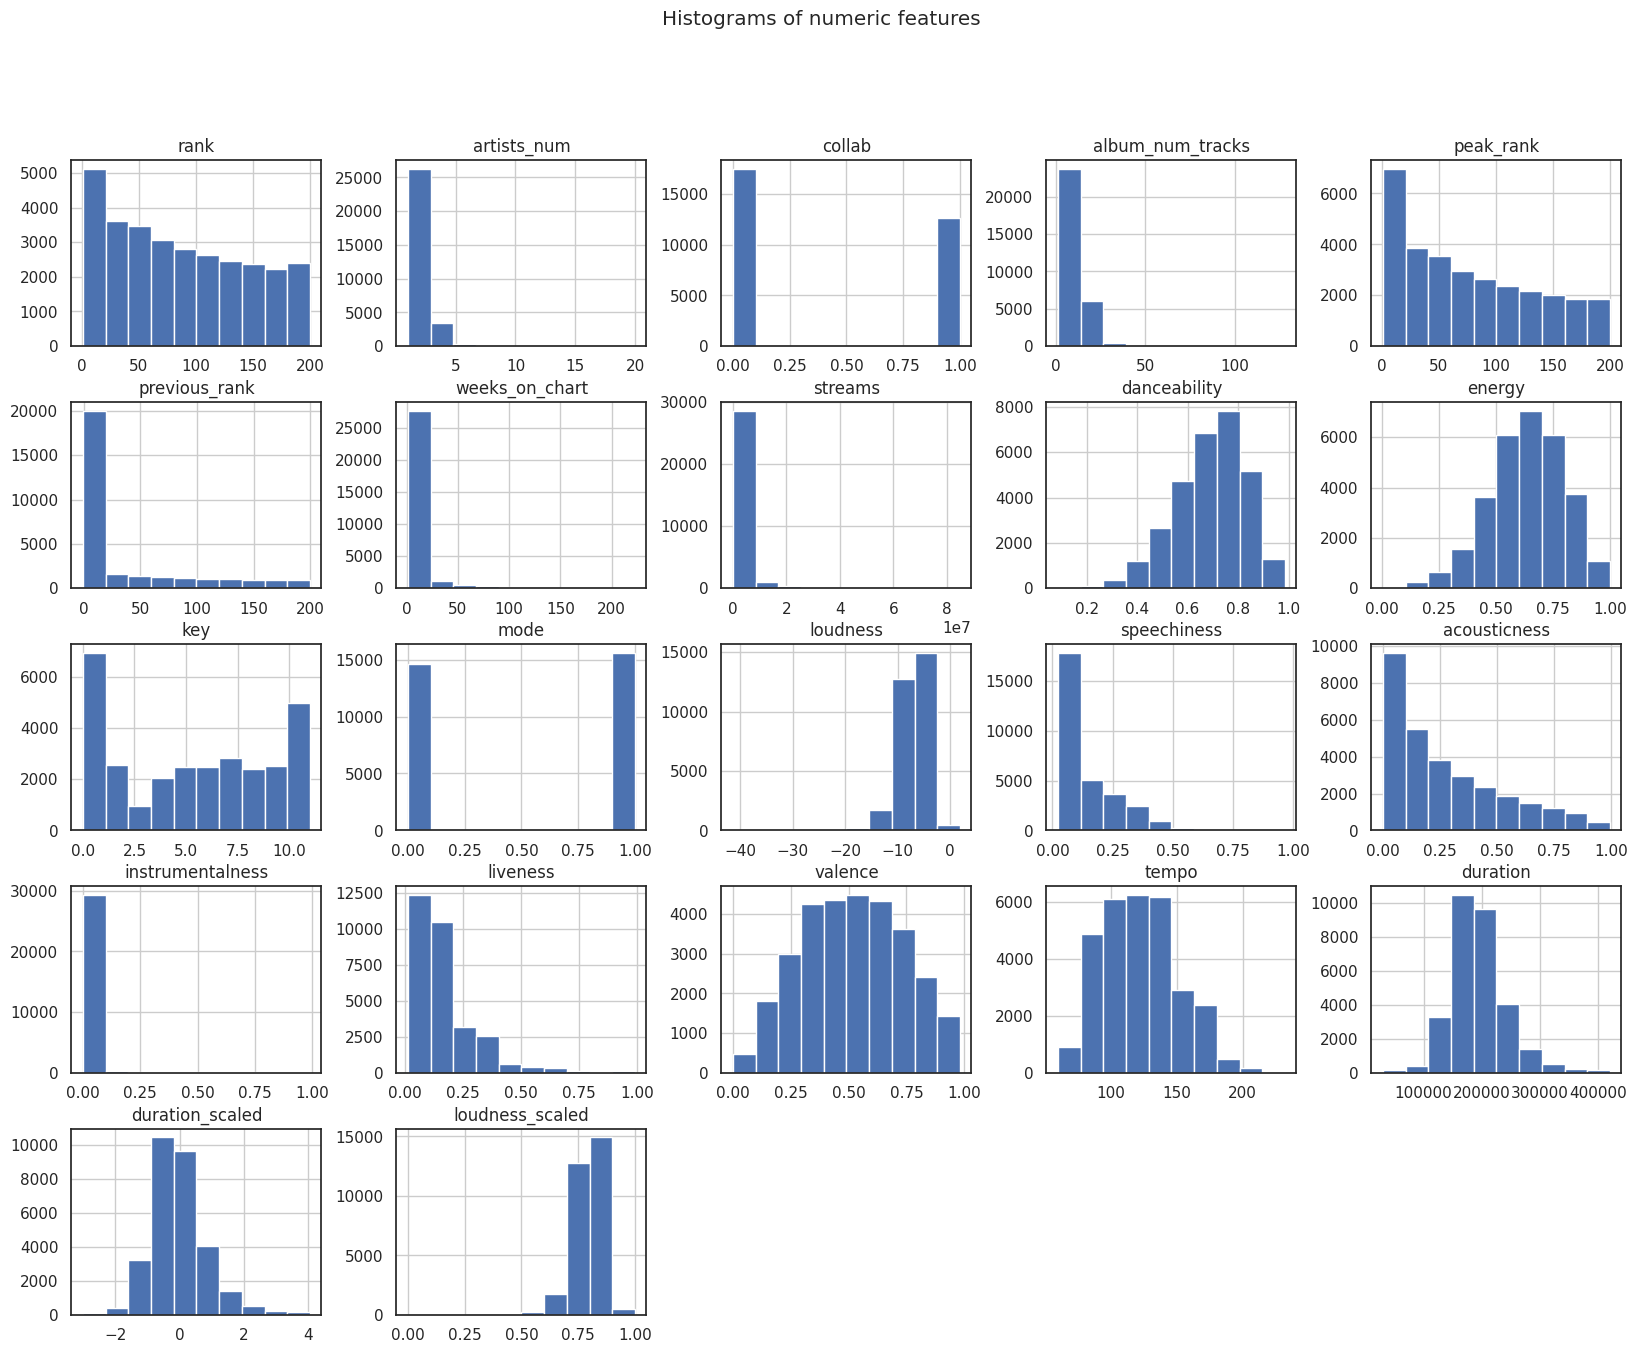

In [ ]:
# Histograms for numeric data
spotify200.hist(figsize=(20, 15))
plt.suptitle('Histograms of numeric features')
plt.show()

Many of the variables exhibit skew, which we want to adjust before modeling. Since the target variable, streams, doesn't follow a normal distribution, we can implement a log transformation. Then, for other plots, we can use boxcox to rescale to make the histograms more normal.

In [ ]:
# Adjusting 'streams' with a logarithmic transformation
# Adding 1 to avoid log(0) which is undefined
spotify200['log_streams'] = np.log(spotify200['streams'] + 1)

In [ ]:
from scipy.stats import boxcox

def scale_feature(col):
  positive_feature = spotify200[col] + 0.01

  # Apply Box-Cox transformation
  transformed_feature, lambda_value = boxcox(positive_feature)

  # Rescale the transformed feature to the range [0, 1]
  min_transformed = transformed_feature.min()
  max_transformed = transformed_feature.max()
  scaled_feature = (transformed_feature - min_transformed) / (max_transformed - min_transformed)

  return scaled_feature, lambda_value

In [ ]:
scaled_features = []
cols = ['danceability', 'energy', 'acousticness', 'valence', 'speechiness', 'instrumentalness', 'liveness']

# Loop through columns
for col in cols:
    scaled_feature, lambda_value = scale_feature(col)
    scaled_features.append(scaled_feature)
    spotify200[f"{col}_scaled"] = scaled_feature
    print(f"{col}: {lambda_value}")

danceability: 1.8727468773791256
energy: 1.4359906926636012
acousticness: 0.26999296375624837
valence: 0.8510857502359288
speechiness: -0.3080799918372025
instrumentalness: -4.627932820446338
liveness: -0.47956533342267477


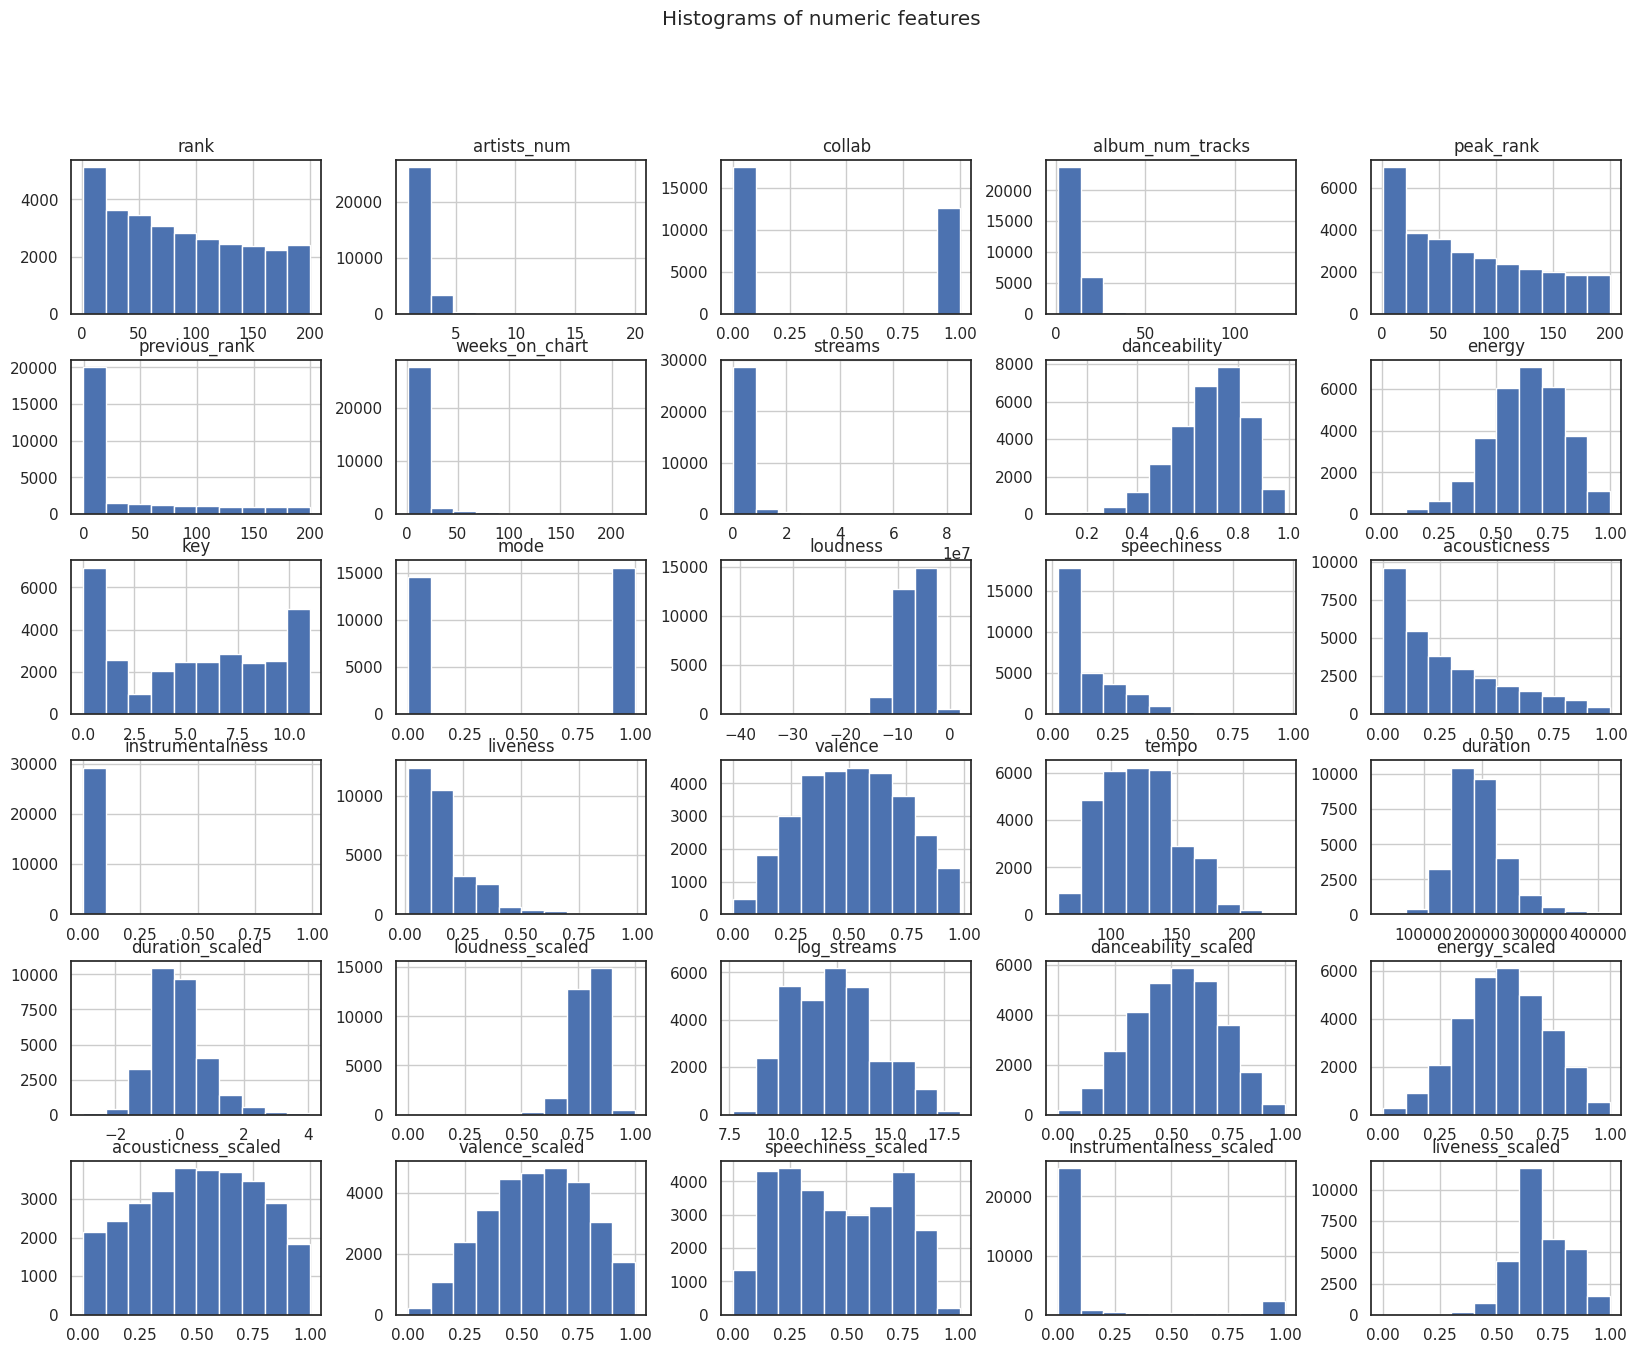

In [ ]:
# Histograms for numeric data
spotify200.hist(figsize=(20, 15))
plt.suptitle('Histograms of numeric features')
plt.show()

In [ ]:
# Select binary columns
binary_columns200 = [col for col in spotify200.columns if spotify200[col].nunique() == 2]

# Select numeric columns
numeric_cols200 = spotify200.select_dtypes(include=['float64', 'int64']).columns

# Select non-binary numeric columns
non_binary_numeric_cols200 = [col for col in numeric_cols200 if (col not in binary_columns200) and (spotify200[col].nunique() > 2)]

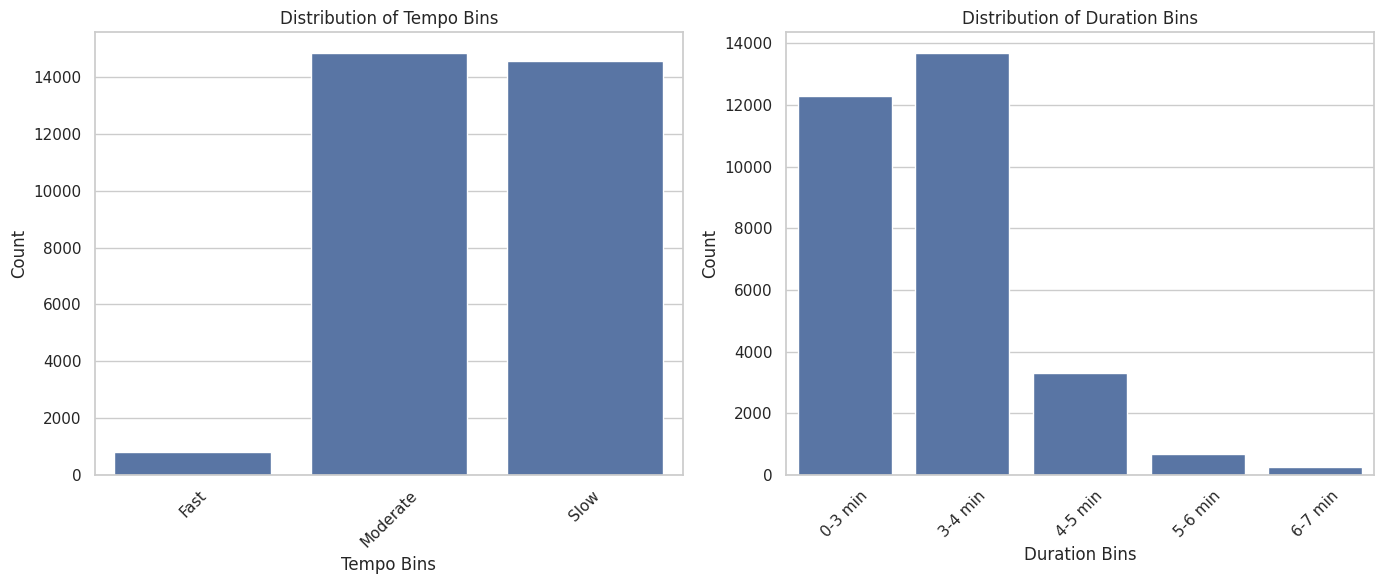

In [ ]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for 'tempo_binned'
sns.countplot(data=spotify200, x='tempo_binned', order=sorted(spotify200['tempo_binned'].unique()), ax=axes[0])
axes[0].set_title('Distribution of Tempo Bins')
axes[0].set_xlabel('Tempo Bins')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot for 'duration_binned'
sns.countplot(data=spotify200, x='duration_binned', order=sorted(spotify200['duration_binned'].unique()), ax=axes[1])
axes[1].set_title('Distribution of Duration Bins')
axes[1].set_xlabel('Duration Bins')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the selected features to polynomial features
X_poly = poly.fit_transform(spotify200[numeric_cols200])

# Create a DataFrame with the polynomial features
poly_feature_names = poly.get_feature_names_out(numeric_cols200,)
poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Concatenate the original DataFrame with the polynomial features
spotify_poly = pd.concat([spotify200['streams'], poly_df], axis=1)

spotify_poly.head()

# Now you have a DataFrame 'spotify_poly' containing the original features along with polynomial features.

streams   rank  artists_num  collab  album_num_tracks  peak_rank  \
0   367531   74.0          3.0     1.0               1.0       73.0   
1  6311640  125.0          2.0     1.0               1.0      125.0   
2     7067  106.0          1.0     0.0              12.0       84.0   
3  2114019  105.0          3.0     1.0               1.0      105.0   
4  1060719   29.0          2.0     1.0               2.0       29.0   

   previous_rank  weeks_on_chart    streams  danceability  ...  \
0           73.0             3.0   367531.0         0.620  ...   
1           -1.0             1.0  6311640.0         0.753  ...   
2          103.0            48.0     7067.0         0.847  ...   
3           -1.0             1.0  2114019.0         0.841  ...   
4           -1.0             1.0  1060719.0         0.820  ...   

   valence_scaled^2  valence_scaled speechiness_scaled  \
0          0.800745                           0.257150   
1          0.516384                           0.565178   
2          0.299439                           0.461503   
3          0.132473                           0.254887   
4          0.315540                           0.421811   

   valence_scaled instrumentalness_scaled  valence_scaled liveness_scaled  \
0                                0.000000                        0.474918   
1                                0.196356                        0.489338   
2                                0.003406                        0.472556   
3                                0.000000                        0.298589   
4                                0.000000                        0.406825   

   speechiness_scaled^2  speechiness_scaled instrumentalness_scaled  \
0              0.082581                                    0.000000   
1              0.618582                                    0.214910   
2              0.711278                                    0.005249   
3              0.490418                                    0.000000   
4              0.563874                                    0.000000   

   speechiness_scaled liveness_scaled  instrumentalness_scaled^2  \
0                            0.152515                   0.000000   
1                            0.535576                   0.074665   
2                            0.728313                   0.000039   
3                            0.574504                   0.000000   
4                            0.543840                   0.000000   

   instrumentalness_scaled liveness_scaled  liveness_scaled^2  
0                                 0.000000           0.281672  
1                                 0.186072           0.463708  
2                                 0.005375           0.745757  
3                                 0.000000           0.673007  
4                                 0.000000           0.524518  

[5 rows x 496 columns]

The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [ ]:
columns_to_multiply = ['energy', 'loudness']

spotify200['vibe'] = spotify200[columns_to_multiply].prod(axis=1)

In [ ]:
target_variable = 'streams'

correlation_matrix = spotify200[['streams', 'vibe', 'danceability', 'energy', 'acousticness', 'valence', 'loudness', 'speechiness', 'instrumentalness', 'liveness']].corr()
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print("Top correlated features with the target variable:")
print(correlation_with_target)

Top correlated features with the target variable:
streams             1.000000
vibe                0.115062
loudness            0.080311
liveness            0.012197
danceability        0.005500
energy             -0.008720
speechiness        -0.012710
instrumentalness   -0.023011
valence            -0.036112
acousticness       -0.037858
Name: streams, dtype: float64


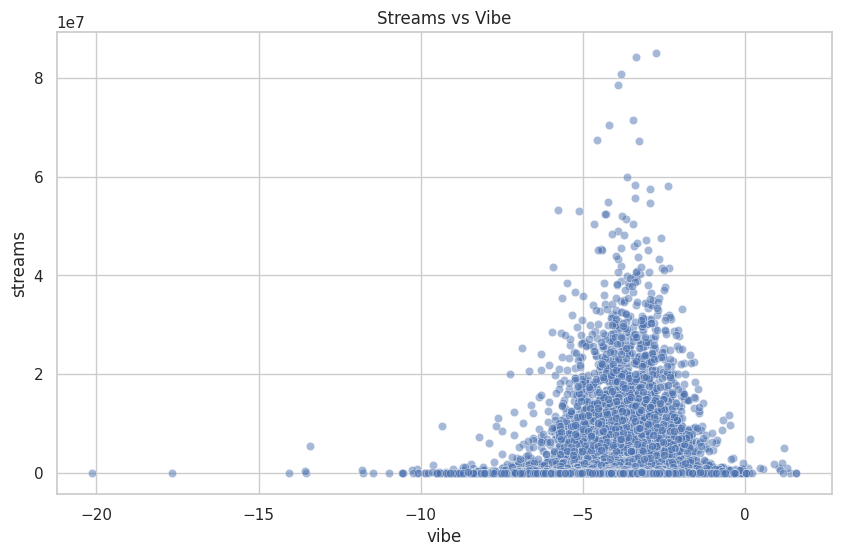

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vibe', y='streams', data=spotify200, alpha=0.5)
plt.title('Streams vs Vibe')
plt.show()

In [ ]:
# Count entries for "United States" directly
us_count = (spotify200['country'] == "United States").sum()
print(f"Number of rows for United States: {us_count}")

Number of rows for United States: 512


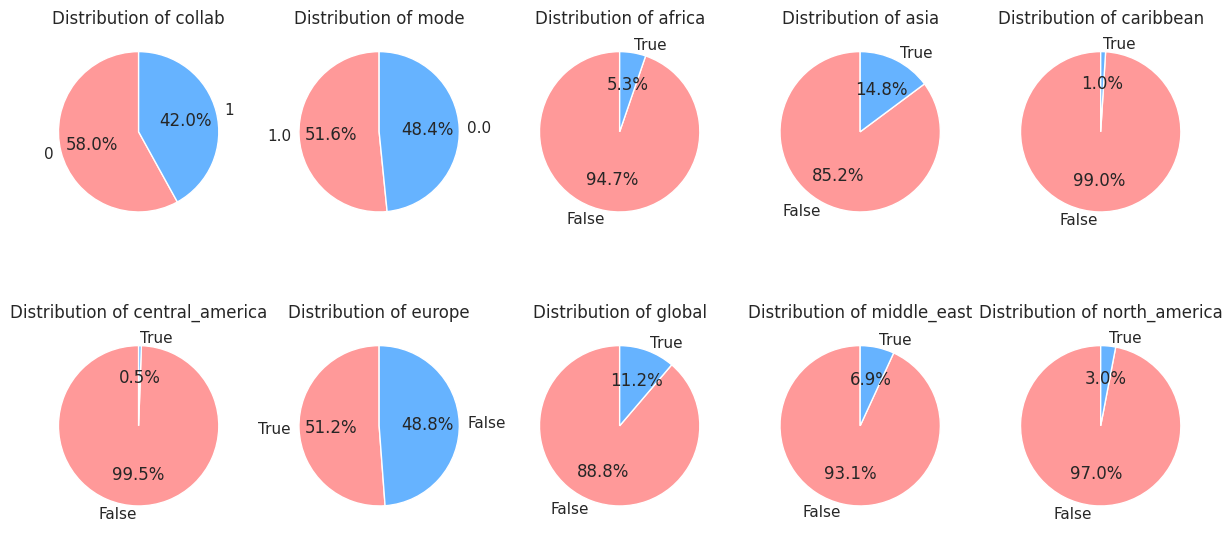

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))

axes = axes.flatten()

for ax, col in zip(axes, binary_columns200):
    spotify200[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax, colors=['#FF9999','#66b3ff'])
    ax.set_title(f'Distribution of {col}')
    ax.set_ylabel('')

for i in range(len(binary_columns200), len(axes)):
    axes[i].axis('off')

we don't need to adjust outliers

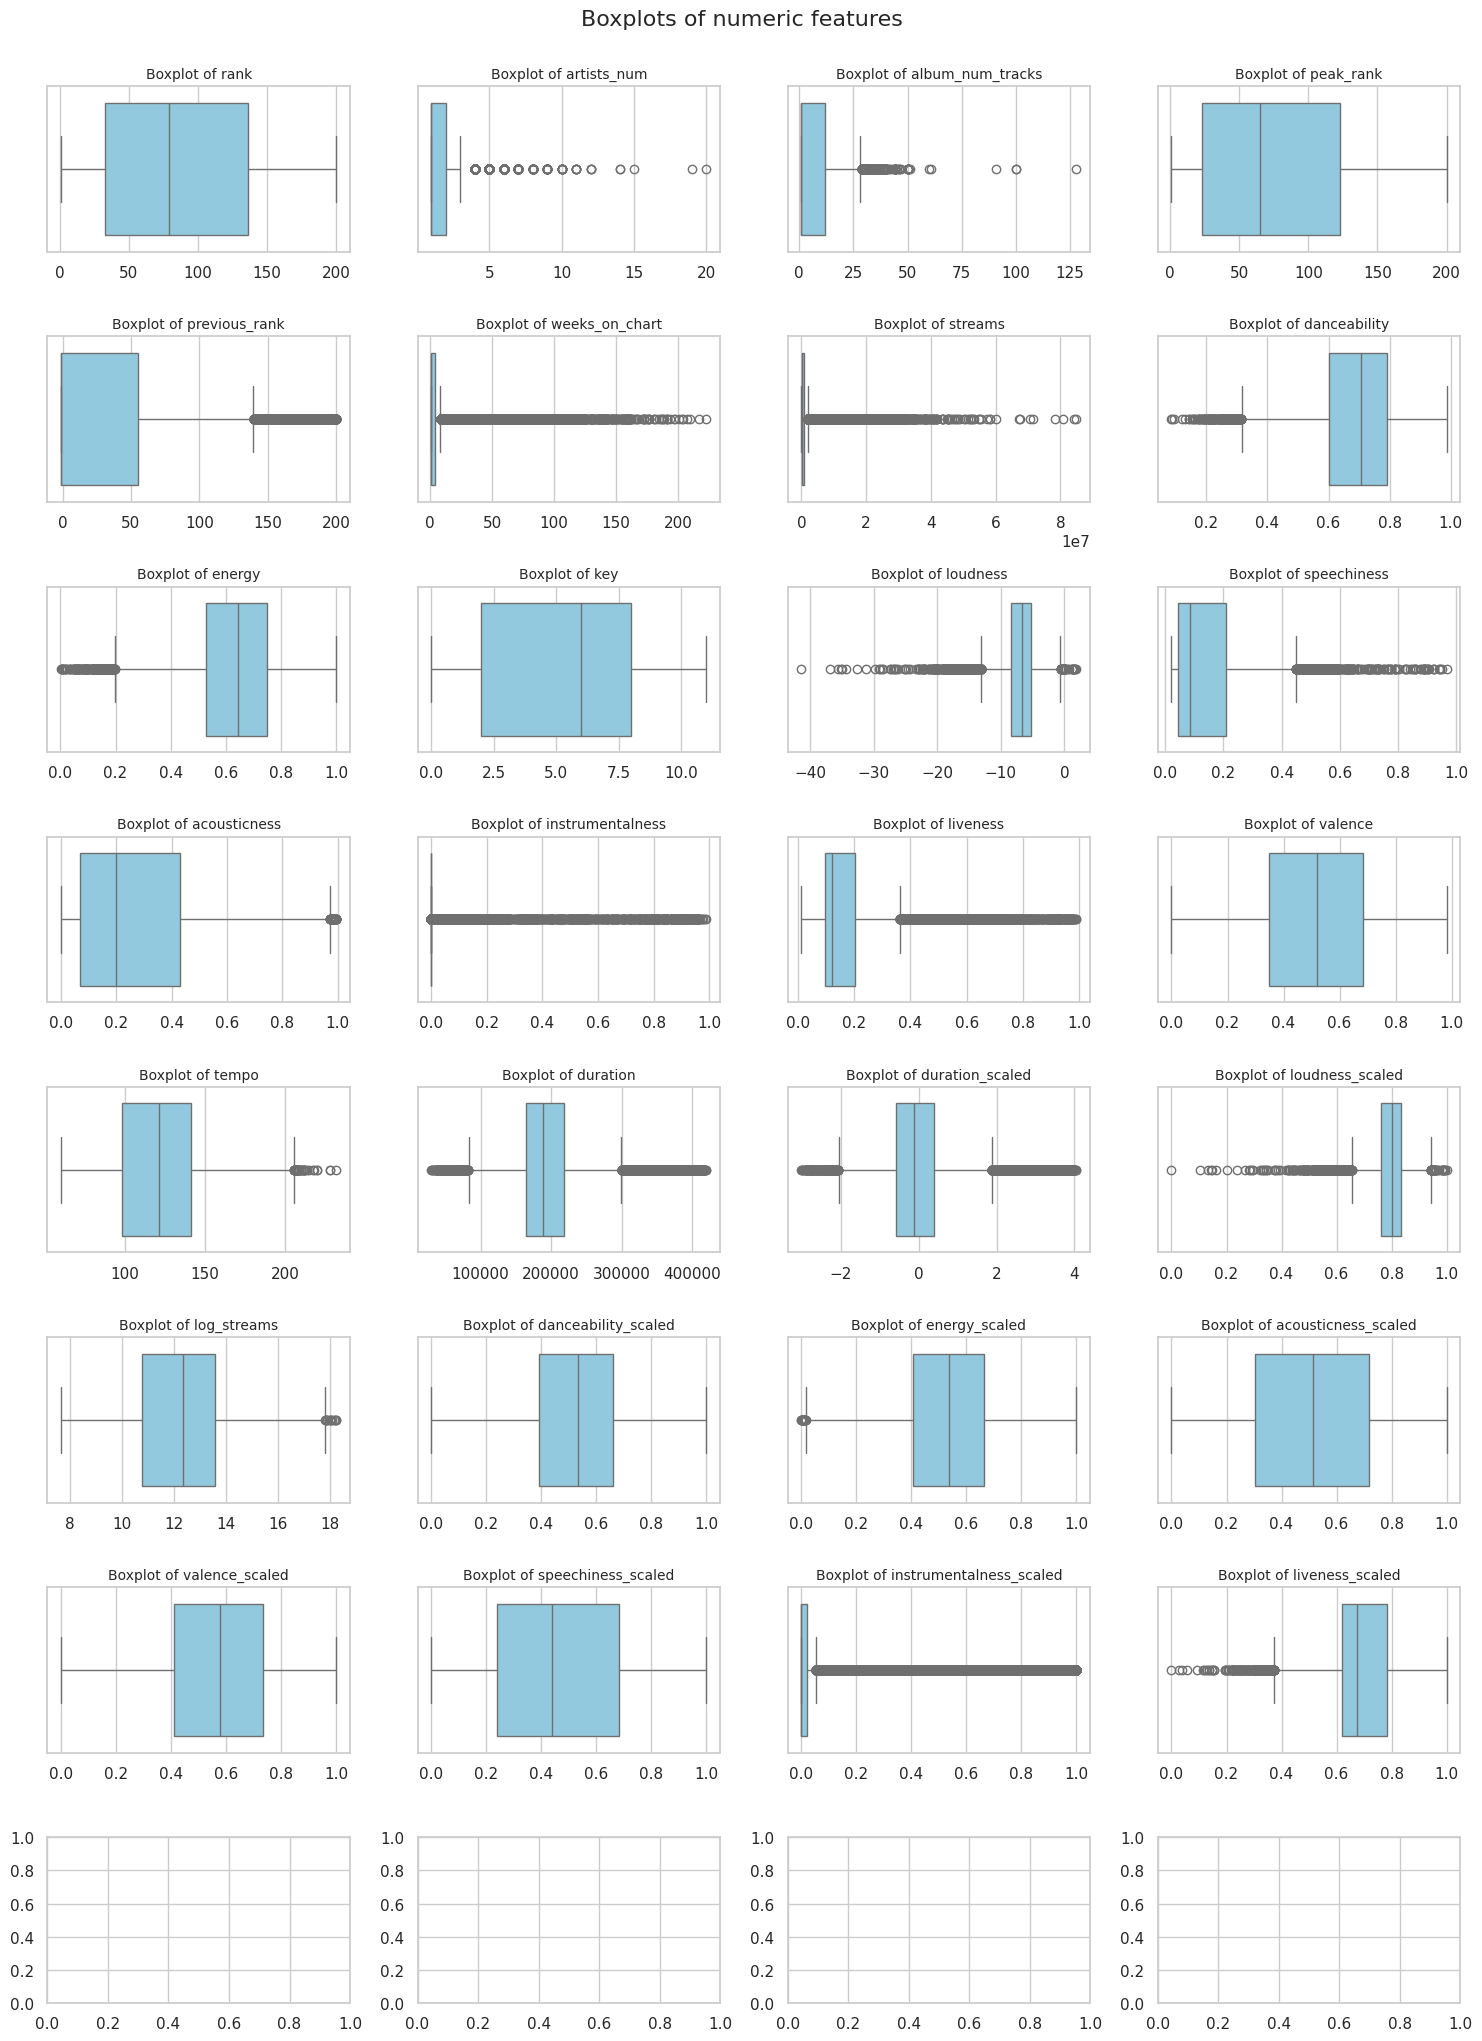

In [ ]:
# Boxplots for numeric data to check outliers
r = len(non_binary_numeric_cols200)//4 + 1
fig, axes = plt.subplots(nrows=r, ncols=4, figsize=(15, 20))
axes = axes.flatten()
for i, c in enumerate(non_binary_numeric_cols200):
    sns.boxplot(x=spotify200[c], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {c}', fontsize=10)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.suptitle('Boxplots of numeric features', fontsize=16, y=1.02)
plt.show()

A major difference in this dataset from the previous one is the geographical description of charting. To understand how track charting is represented in the dataset, we can create a Folium plot.

In [ ]:
import folium
import geopandas as gpd

spotify200['week'] = pd.to_datetime(spotify200['week'])
spotify200['year'] = spotify200['week'].dt.year

grouped_data = spotify200.groupby(['country', 'year'])['streams'].sum().reset_index()
rename_countries = {
    'Korea': 'South Korea',
    'United States': 'United States of America'
}
grouped_data['country'] = grouped_data['country'].replace(rename_countries)

countries_geo = gpd.read_file('drive/My Drive/countries.geo.json')
merged_countries = countries_geo.merge(grouped_data, left_on='name', right_on='country', how='inner')
merged_countries['year'] = merged_countries['year'].astype(str)
merged_countries.dropna(inplace=True)

In [ ]:
# Get unique countries from both DataFrames
countries_grouped = set(grouped_data['country'].unique())
countries_geo_names = set(countries_geo['name'].unique())

# Calculate the difference: countries in 'countries_grouped' not in 'countries_geo_names'
unique_countries = countries_grouped.difference(countries_geo_names)

# Now 'unique_countries' contains the names of countries in 'countries_grouped' but not in 'countries_geo_names'
print(unique_countries)

{'Hong Kong', 'Singapore', 'Global'}


Download this [json file](https://drive.google.com/file/d/1OsZz5Ht3NFMhTZCXpVuJTolwgW7hk9Hn/view?usp=sharing) and add it to your MyDrive.

In [ ]:
# Initialize a base map
m = folium.Map(location=[20, 0], zoom_start=2)

# Loop through each year and create a choropleth layer
for year in merged_countries['year'].unique():
    year_data = merged_countries[merged_countries['year'] == year]

    choropleth = folium.Choropleth(
        geo_data=countries_geo,
        name=f'Choropleth {year}',
        data=year_data,
        columns=['name', 'streams'],
        key_on='feature.properties.name',
        fill_color='PuRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f'Streams per Country in {year}',
        highlight=True,
        line_color='black',
        show=False  # Set to False so that not all layers are visible at the start
    ).add_to(m)

    # Add hover functionality for each layer
    style_function = lambda x: {'fillColor': '#dd1c77' if x['properties']['streams'] is None else '#0000ff',
                                'color':'#000000', 'fillOpacity': 0.1, 'weight': 0.1}
    highlight_function = lambda x: {'fillColor': '#c994c7', 'color':'#e7e1ef', 'fillOpacity': 0.50, 'weight': 0.1}

    folium.features.GeoJson(
        data=year_data,
        style_function=style_function,
        control=False,  # Do not add another LayerControl for this
        highlight_function=highlight_function,
        tooltip=folium.features.GeoJsonTooltip(
            fields=['country', 'streams'],
            aliases=['Country: ', 'Streams: '],
            style=("background-color: white; color: #400073; font-family: arial; font-size: 12px; padding: 10px;")
        )
    ).add_to(choropleth)

# Add layer control to switch between years
folium.LayerControl().add_to(m)

# Display the map
m

In [ ]:
m.save('/content/drive/My Drive/stream_map.html')

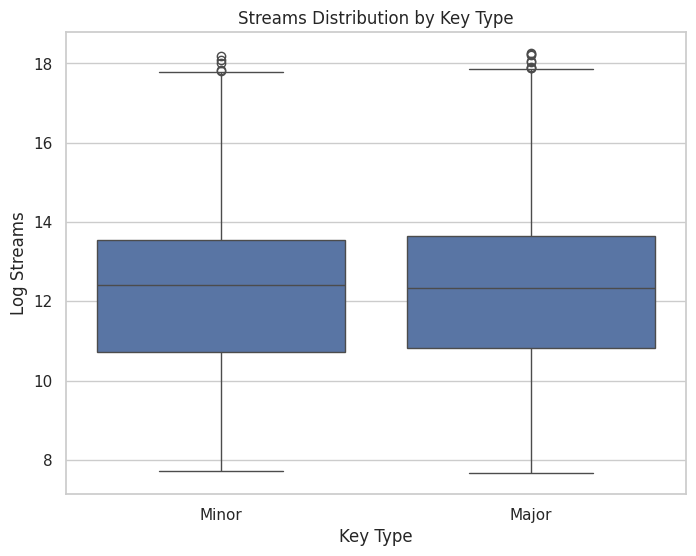

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(data=spotify200, x='mode', y='log_streams')
plt.title('Streams Distribution by Key Type')
plt.xlabel('Key Type')
plt.xticks(ticks=[0, 1], labels=['Minor', 'Major'])
plt.ylabel('Log Streams')
plt.show()

To visualize our results more concretely, we can use a bar plot to look at the global distribution of streams on the charts.

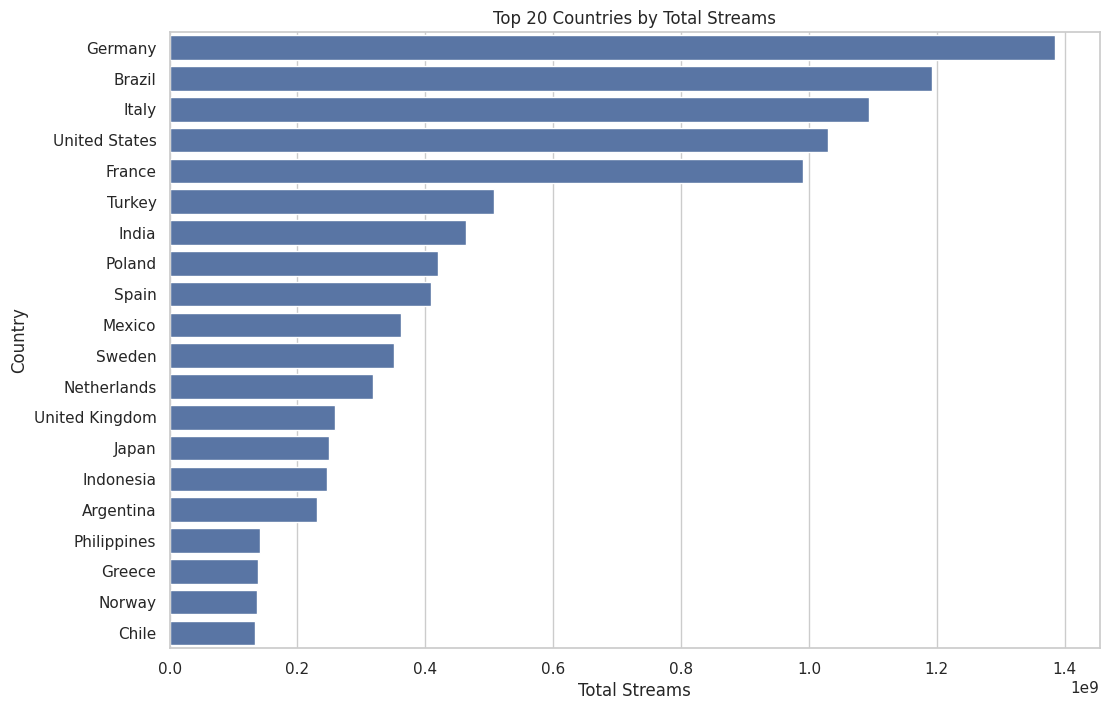

In [ ]:
# Exclude 'global' from the dataframe
spotify_countries_filtered = spotify200[spotify200['country'] != 'Global']

# Aggregate total streams by country
country_streams = spotify_countries_filtered.groupby('country')['streams'].sum().sort_values(ascending=False)

top_20_countries = country_streams.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_countries.values, y=top_20_countries.index)
plt.title('Top 20 Countries by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Country')
plt.show()

Now, we will look more closely at data for the United States. We will perform more data cleaning such as assigning broader genres for the subgenres in the dataset, removing duplicates, and calculating a rating percentage. Removing duplicates is vital for our modeling, since a song may chart multiple times in a different position each time, so removing duplicates is necessary to understand where a song's true performance lies for predictive modeling.

In [ ]:
def filtering(df, country, artist='ALL'):
    # Filter DataFrame based on country
    dfs = df[df['country'] == country].copy()  # Make a copy to avoid warnings

    # Calculate reversed rank
    dfs.loc[:, 'rrank'] = 201 - dfs['rank']

    # Perform text cleaning on artist_genre column
    dfs.loc[:, 'Artist_genre2'] = dfs['artist_genre'].str.replace(" ", "")
    dfs.loc[:, 'Artist_genre3'] = 'misc'

    # Drop unnecessary column
    dfs = dfs.drop(['artists_num'], axis=1)

    # Assign genre based on text patterns
    genres = ['pop', 'rock', 'hiphop', 'trap', 'rap', 'reggae', 'r&b', 'dance', 'indie', 'electro', 'latin']
    for genre in genres:
        dfs.loc[:, 'Artist_genre3'] = np.where(dfs['Artist_genre2'].str.contains(r'^'+genre), genre, dfs['Artist_genre3'])
        dfs.loc[:, 'Artist_genre3'] = np.where(dfs['Artist_genre2'].str.contains(r''+genre+'$'), genre, dfs['Artist_genre3'])

    # Remove duplicated lines based on specified columns
    dfs = dfs.drop_duplicates(['rank', 'artist_names', 'week', 'Artist_genre3'])

    # Calculate Total for each week
    dfs['Total'] = dfs.groupby('week')['rrank'].transform('sum')

    # Filter by artist if specified
    if artist != 'ALL':
        dfs = dfs[dfs['artist_individual'] == artist]

    # Grouping and ranking
    dfg = dfs.groupby(['country', 'week', 'Artist_genre3'], as_index=False).agg({
            'rank': 'sum',
            'weeks_on_chart': 'sum',
            'rrank': 'sum',
            'Total': 'max'
        })

    # Calculate percent rating
    dfg['Percent'] = dfg['rrank'] / dfg['Total']

    # Creating a dictionary to be used in the charts
    df_dict = {ag: dfg[dfg['Artist_genre3'] == ag] for ag in dfg['Artist_genre3'].unique()}

    return dfs, dfg, df_dict

In [ ]:
import plotly.graph_objects as go
import pandas as pd

def graphs(df, country, artist='ALL'):
    # Filtering data and preparing dictionaries
    dfs, dfg, df_dict = filtering(df, country, artist)
    genres = list(df_dict.keys())

    # Remove 'misc' genre if present
    if 'misc' in genres:
        genres.remove('misc')

    # Sort genres by their average 'Percent' value, highest first
    genres_sorted = sorted(genres, key=lambda x: df_dict[x]['Percent'].mean(), reverse=True)

    # Create a Plotly figure
    fig = go.Figure()

    # Plotting each genre in sorted order
    for genre in genres_sorted:
        # Ensure data is sorted by 'week' for a correct line plot
        genre_data = df_dict[genre].sort_values(by='week')
        fig.add_trace(go.Scatter(
            x=genre_data['week'],
            y=genre_data['Percent'].rolling(4).mean(),  # Applying a rolling mean
            mode='lines',
            name=genre,  # Genre name will be used in the legend and for hover info
            hoverinfo='name+y'  # Customize hover text
        ))

    # Setting title based on country and artist
    if artist == 'ALL':
        title = f'Spotify Top Genres Weekly: {df_dict[genres_sorted[0]]["country"].unique()[0]}'
    else:
        title = f'Spotify Top Genres Weekly: {df_dict[genres_sorted[0]]["country"].unique()[0]} {artist}'

    # Update layout with title and axis labels
    fig.update_layout(
        title=title,
        xaxis_title='Week',
        yaxis_title='Rating',
        plot_bgcolor='whitesmoke',  # Background color
        hovermode='closest'  # Hover over any data point
    )

    # Adding a legend positioned outside the plot area
    fig.update_layout(legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1.01
    ))

    fig.show()

In [ ]:
graphs(spotify200, 'United States')

correlation heatmap

In [ ]:
target_variable = 'streams'

correlation_matrix = spotify200[numeric_cols200].corr()
correlation_with_target = correlation_matrix[target_variable].sort_values(ascending=False)

print("Top correlated features with the target variable:")
print(correlation_with_target)

Top correlated features with the target variable:
streams                    1.000000
log_streams                0.634241
album_num_tracks           0.120577
loudness_scaled            0.080311
loudness                   0.080311
duration                   0.031286
duration_scaled            0.031286
mode                       0.027508
liveness                   0.012197
collab                     0.011793
liveness_scaled            0.009467
danceability_scaled        0.005873
artists_num                0.005694
danceability               0.005500
tempo                      0.004837
speechiness_scaled        -0.007066
key                       -0.008430
energy                    -0.008720
energy_scaled             -0.009937
speechiness               -0.012710
instrumentalness_scaled   -0.017715
instrumentalness          -0.023011
valence                   -0.036112
valence_scaled            -0.037003
acousticness              -0.037858
acousticness_scaled       -0.045144
weeks_on_chart

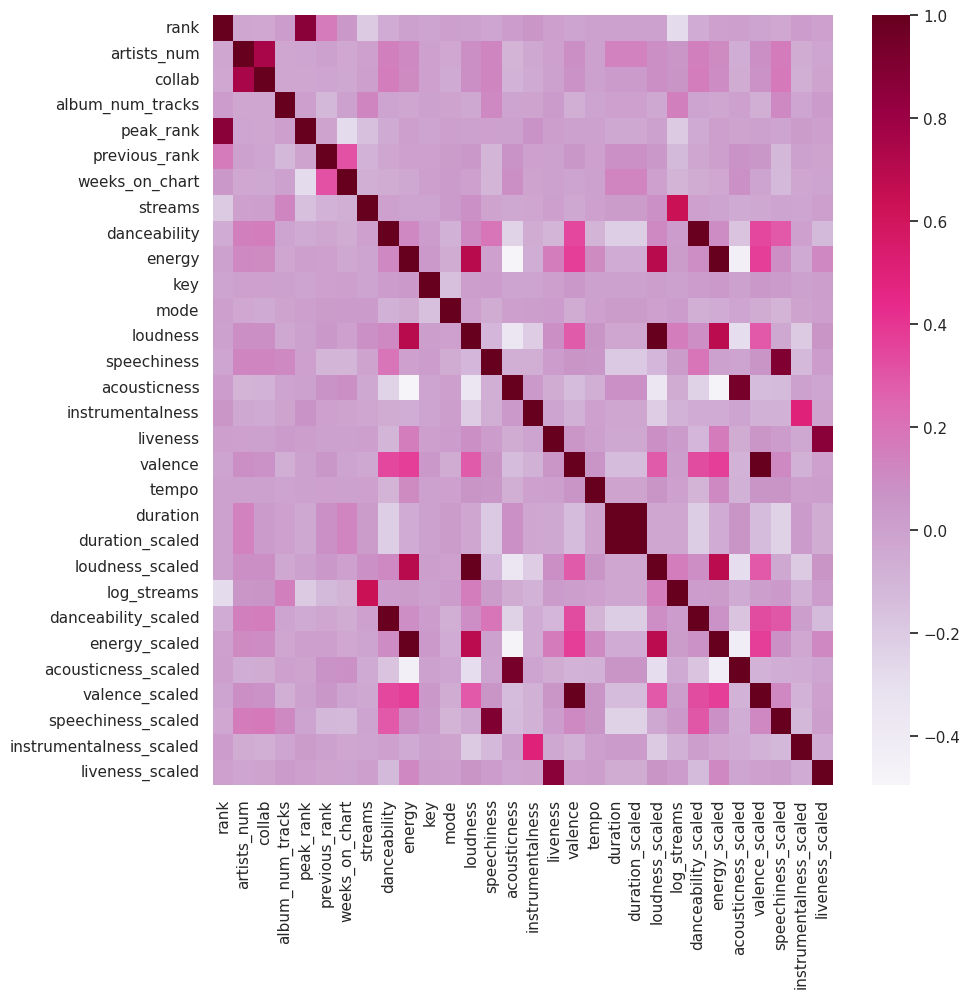

In [ ]:
plt.figure(figsize=(10, 10))

# plotting correlation heatmap
dataplot = sns.heatmap(correlation_matrix, cmap="PuRd")

# displaying heatmap
plt.show()

We will now perform k-means clustering for unsupervised learning to understand whether any clusters are present in our data. There don't appear to be any meaningful results.

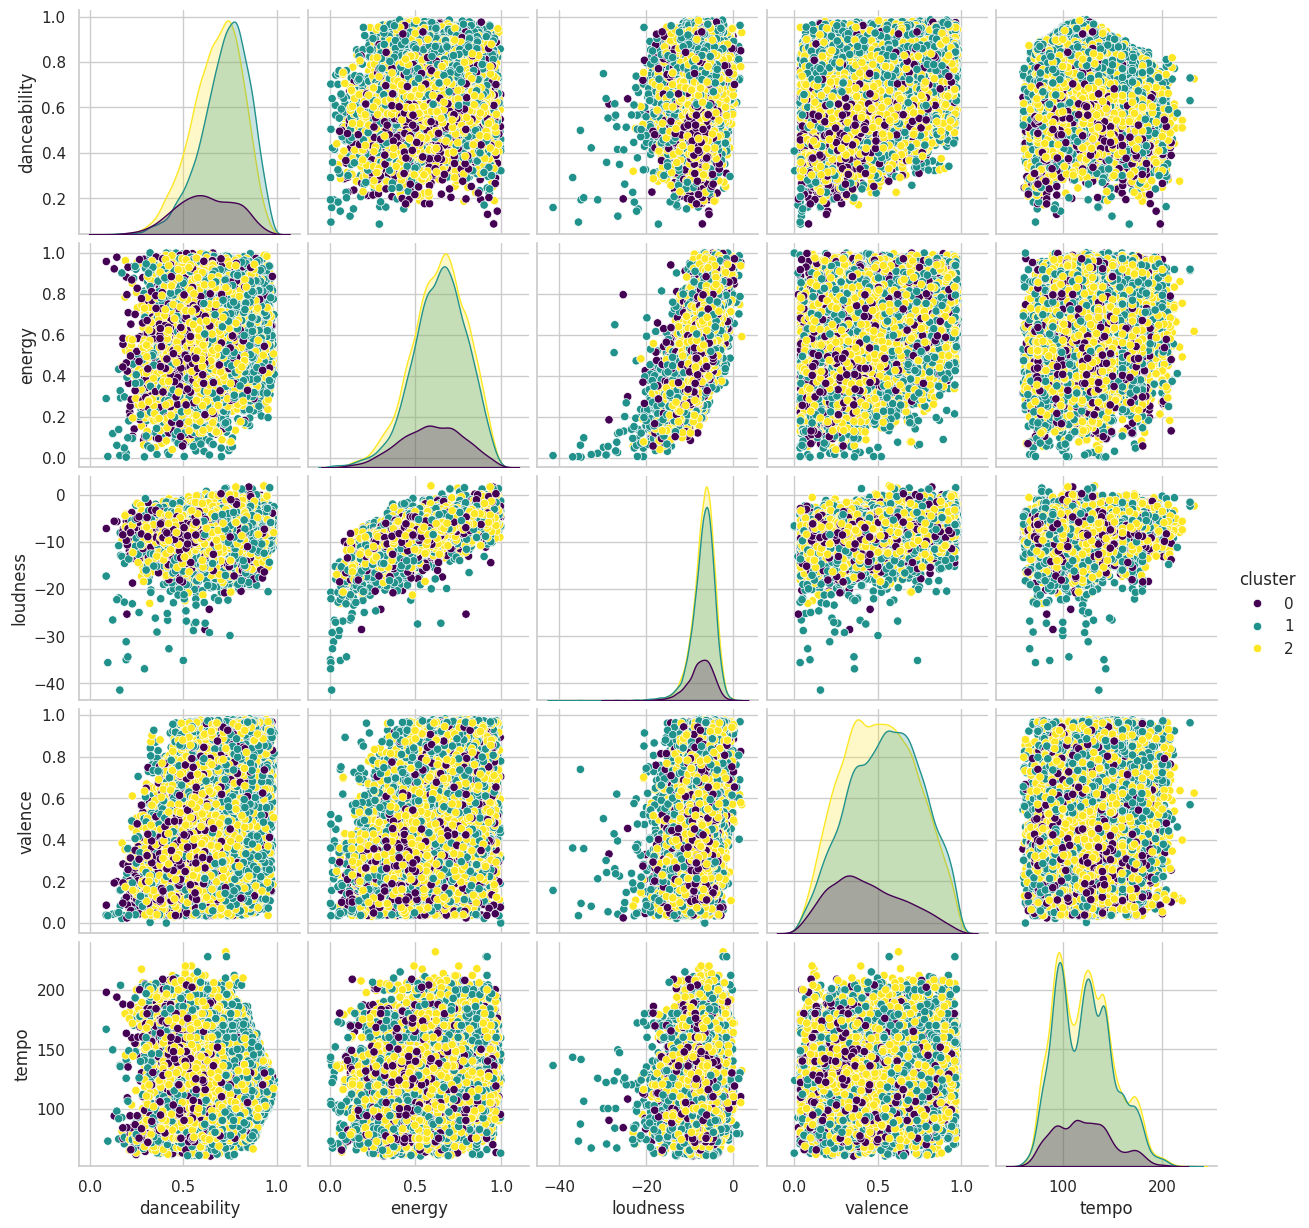

In [ ]:
from sklearn.cluster import KMeans

# Selecting relevant features from the DataFrame
X = spotify200[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']]

# Choosing the number of clusters and explicitly setting n_init to avoid random initialization repetitive warning
kmeans = KMeans(n_clusters=3, n_init=10)

# Fit the model
kmeans.fit(X)

# Assign the cluster labels back to the original DataFrame
spotify200['cluster'] = kmeans.labels_

sns.pairplot(spotify200[['danceability', 'energy', 'loudness', 'valence', 'tempo', 'cluster']], hue='cluster', palette='viridis')
plt.show()

In [ ]:
spotify200.to_csv('spotify200.csv', index=False)
!cp spotify200.csv "drive/My Drive/"

# Modeling for the Spotify Tracks Dataset

We can start modeling with a simple LinearRegression since our target value is a range of values, then determine if another model is necessary based of R^2 and MSE values.

In [ ]:
features = spotify_numerical.drop('popularity', axis = 1)
target = spotify_numerical['popularity']

features.dropna(inplace=True)
target.dropna(inplace=True)

<ipython-input-50-6c568852d8b3>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#making test and training sets
seed = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = seed)

In [ ]:
lin = LinearRegression()
lin.fit(X_train, y_train)

train_pred = lin.predict(X_train)
test_pred = lin.predict(X_test)

lin_reg_score_test = lin.score(X_test, y_test)
lin_reg_score_train = lin.score(X_train, y_train)
mse = mean_squared_error(y_test, test_pred)

print('Test Set R^2 value: ' + str(lin_reg_score_test))
print('Training Set R^2 value: ' + str(lin_reg_score_train))
print('Mean Squared Error: ' + str(mse))

Test Set R^2 value: 0.020792259154221227
Training Set R^2 value: 0.023777754888221092
Mean Squared Error: 483.2203028162697


Since our fit is very low, we can try using PCA to simplify our data better.

In [ ]:
#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#instantiate pca
pca = PCA()
X2 = pca.fit(X_train_scaled)

Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of PCA Components')

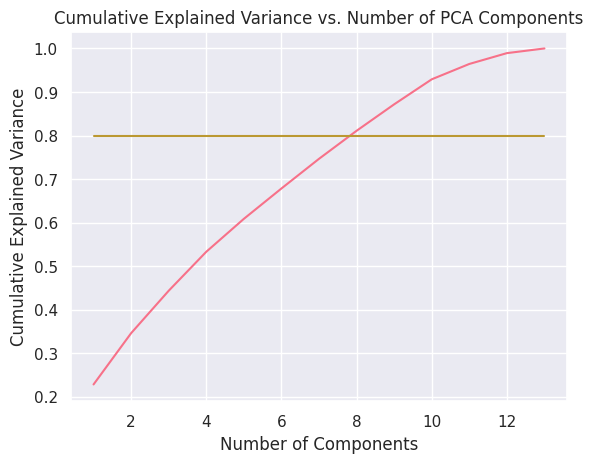

In [ ]:
#find number of components
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)
x_ticks = np.arange(len(cum_evr)) + 1

plt.plot(size = [8, 6])
sns.lineplot(x = x_ticks, y = cum_evr)
sns.lineplot(x = x_ticks, y = 0.8 * np.ones(len(cum_evr)))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of PCA Components')

In [ ]:
# Based on the graph there are 8 components
n = 8
pca = PCA(n_components = n)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
#linear model fit based on pca
lin.fit(X_train_pca, y_train)

train_pred = lin.predict(X_train_pca)
test_pred = lin.predict(X_test_pca)

lin_pca_score_test = lin.score(X_test_pca, y_test)
lin_pca_score_train = lin.score(X_train_pca, y_train)
mse_lin_pca = mean_squared_error(y_test, test_pred)

print('Test Set R^2 value: ' + str(lin_pca_score_test))
print('Training Set R^2 value: ' + str(lin_pca_score_train))
print('Mean Squared Error: ' + str(mse_lin_pca))

Test Set R^2 value: 0.0045091224232166605
Training Set R^2 value: 0.0053190585763905895
Mean Squared Error: 491.25571954526595


We see that the R^2 actually decreased for the PCA dataset, so we can proceed with modeling on the raw data. We can try using gradient boosting regression to see if the R^2 values will increase above 0.1, since gradient boosting regression is usually better at capturing nonlinear relationships.

In [ ]:
xgbr = XGBRegressor(eta=0.1, max_depth=8, seed=42)

# Fit a model
xgbr.fit(X_train, y_train)

# Predict the target variable for the training/test set
y_pred_xgbr = xgbr.predict(X_test)
y_pred_xgbr_train = xgbr.predict(X_train)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_xgbr_train)
r2_test = r2_score(y_test, y_pred_xgbr)
mse = mean_squared_error(y_test, y_pred_xgbr)

print('Test Set R^2 value: ' + str(r2_test))
print('Train Set R^2 value: ' + str(r2_train))
print('Mean Squared Error: ' + str(mse))

Test Set R^2 value: 0.26882059153209925
Train Set R^2 value: 0.38022912621854077
Mean Squared Error: 360.8230617822767


Based on these R^2 values, we can determine that the raw data is definitely better than the PCA data. Our model is likely overfitting slightly since the R^2 of the training is ~0.1 greater than the R^2 of the test set. While we could try other models, such as Random Forest regression, since we are likely already experiencing some kind of overfitting, using a more complicated model such as Random Forest would likely exacerbate this problem. Next, we can perform hyperparameter tuning with randomized search on the XGBRegressor model. We found that the tuning was very computationally expensive due to our large dataset size, so randomized search was utilized over GridSearch to reduce the runtime.

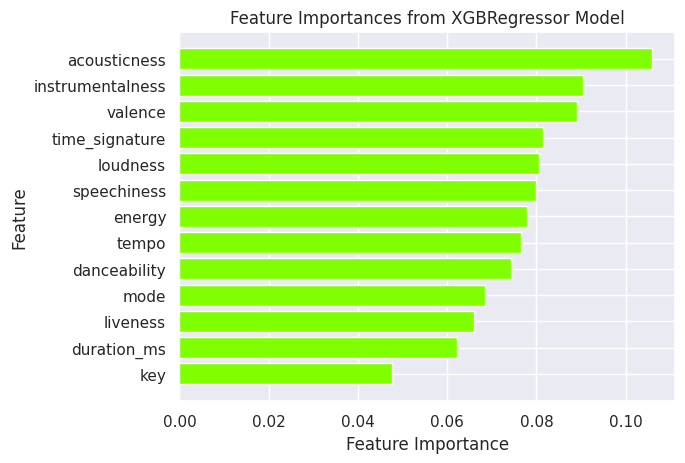

In [ ]:
#feature importance
feature_importances = xgbr.feature_importances_
sorted_indices_descending = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices_descending]
sorted_feature_names = features.columns[sorted_indices_descending]

plt.barh(sorted_feature_names, sorted_feature_importances, color='chartreuse')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from XGBRegressor Model')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#random search to minimize mse

param_dist = {
    'eta': [0.01, 0.1, 1],
    'max_depth': [3, 6, 9, 12, 15]
}
random_search = RandomizedSearchCV(xgbr, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the Randomized Search object to the training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False, eta=0.1,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learni...in=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'eta': [0.01, 0.1, 1],
                                        'max_depth': [3, 6, 9, 12, 15]},
                   scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params = random_search.best_params_
best_score = -(random_search.best_score_)
print(best_params)
print(best_score)

{'max_depth': 15, 'eta': 0.1}
259.6593901009516


We can see that when minimizing MSE, the best model is similar to what was already chosen. We can instead try maximizing R^2 to fix the overfitting issue.

In [ ]:
#random search to maximize r^2
random_search_r2 = RandomizedSearchCV(xgbr, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=-1)

# Fit the Randomized Search object to the training data
random_search_r2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False, eta=0.1,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'eta': [0.01, 0.1, 1],
                                        'max_depth': [3, 6, 9, 12, 15]},
                   scoring='r2')

In [ ]:
best_params_r2 = random_search_r2.best_params_
best_score_r2 = (random_search_r2.best_score_)
print(best_params_r2)
print(best_score_r2)

{'max_depth': 15, 'eta': 0.1}
0.479083888147276


In [ ]:
# Fit the best model (maximizing r2) on the test data
y_pred_random_search = random_search_r2.predict(X_test)

# Evaluate the model
# r2_train = r2_score(y_train, y_pred_xgbr_train)
r2_test = r2_score(y_test, y_pred_random_search)
mse = mean_squared_error(y_test, y_pred_random_search)

print('Test Set R^2 value: ' + str(r2_test))
# print('Train Set R^2 value: ' + str(r2_train))
print('Mean Squared Error: ' + str(mse))

Test Set R^2 value: 0.5285878398355379
Mean Squared Error: 232.63289012522233


Despite previous concerns of overfitting, the model actually performed the best in terms of MSE and R^2 when using the highest max depth in our grid. Since the test set R^2 is slightly higher than the training R^2, there may be slight underfitting but since the error is relatively low, it's not a huge concern.

# Modeling for the Spotify 200 dataset

Optional: reload the dataset in its post-cleaning and post-EDA state.

In [ ]:
spotify200 = pd.read_csv('drive/My Drive/spotify200.csv')

We start modeling with a LinearRegression then determine if another model is necessary based of R^2 and MSE values.

In [ ]:
X = spotify200[numeric_cols200].drop(['streams','log_streams'], axis = 1)
y = spotify200['log_streams']

X.dropna(inplace=True)
y.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin = LinearRegression()
lin.fit(X_train, y_train)

train_pred = lin.predict(X_train)
test_pred = lin.predict(X_test)

lin_reg_score_test = lin.score(X_test, y_test)
lin_reg_score_train = lin.score(X_train, y_train)
mse = mean_squared_error(y_test, test_pred)

print('Test Set R^2 value: ' + str(lin_reg_score_test))
print('Training Set R^2 value: ' + str(lin_reg_score_train))
print('Mean Squared Error: ' + str(mse))

Test Set R^2 value: 0.1506633424359698
Training Set R^2 value: 0.1580835344151389
Mean Squared Error: 3.3123788347332055


Given our poor fit, we attempt using PCA.

In [ ]:
#scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#instantiate pca
pca = PCA()
X2 = pca.fit(X_train_scaled)

Text(0.5, 1.0, 'Cumulative Explained Variance vs. Number of PCA Components')

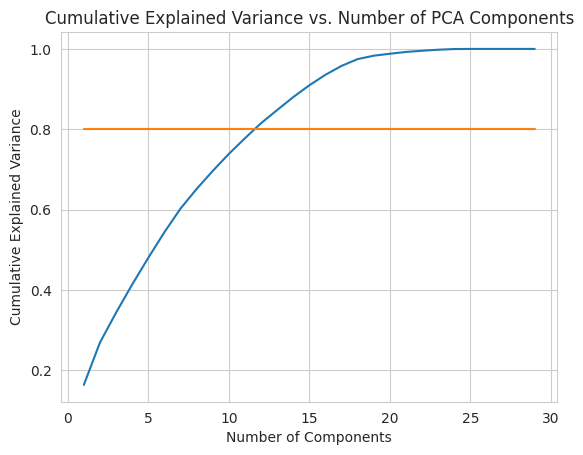

In [ ]:
#find number of components
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)
x_ticks = np.arange(len(cum_evr)) + 1

plt.plot(size = [8, 6])
sns.lineplot(x = x_ticks, y = cum_evr)
sns.lineplot(x = x_ticks, y = 0.8 * np.ones(len(cum_evr)))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of PCA Components')

In [ ]:
# Based on the graph there are 12 components
n = 12
pca = PCA(n_components = n)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
#linear model fit based on pca
lin.fit(X_train_pca, y_train)

train_pred = lin.predict(X_train_pca)
test_pred = lin.predict(X_test_pca)

lin_pca_score_test = lin.score(X_test_pca, y_test)
lin_pca_score_train = lin.score(X_train_pca, y_train)
mse_lin_pca = mean_squared_error(y_test, test_pred)

print('Test Set R^2 value: ' + str(lin_pca_score_test))
print('Training Set R^2 value: ' + str(lin_pca_score_train))
print('Mean Squared Error: ' + str(mse_lin_pca))

Test Set R^2 value: 0.12971678567525946
Training Set R^2 value: 0.12661065197584676
Mean Squared Error: 3.3940695643829897


We see that the R^2 actually decreased for the PCA dataset, so we can proceed with modeling on the raw data. We can try using gradient boosting regression to see if the R^2 values will increase above 0.1, since gradient boosting regression is usually better at capturing nonlinear relationships.

In [ ]:
xgbr = XGBRegressor(eta=0.1, max_depth=8, seed=42)

# Fit a model
xgbr.fit(X_train, y_train)

# Predict the target variable for the training/test set
y_pred_xgbr = xgbr.predict(X_test)
y_pred_xgbr_train = xgbr.predict(X_train)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_xgbr_train)
r2_test = r2_score(y_test, y_pred_xgbr)
mse = mean_squared_error(y_test, y_pred_xgbr)

print('Test Set R^2 value: ' + str(r2_test))
print('Train Set R^2 value: ' + str(r2_train))
print('Mean Squared Error: ' + str(mse))

Test Set R^2 value: 0.21824885444409747
Train Set R^2 value: 0.5896343294734697
Mean Squared Error: 3.048798053759494


Based on these R^2 values, we can determine that the raw data is definitely better than the PCA data. Our model is likely overfitting slightly since the R^2 of the training is greater than the R^2 of the test set.

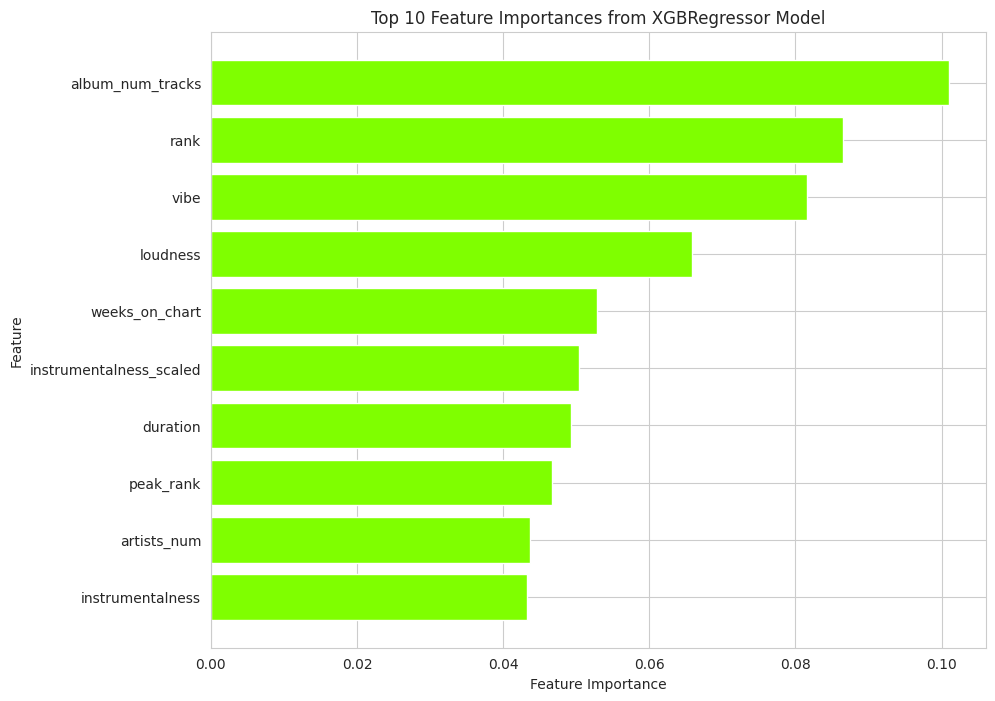

In [ ]:
feature_importances = xgbr.feature_importances_
sorted_indices_descending = np.argsort(feature_importances)[::-1]

# Select the top 10 features
top_10_indices = sorted_indices_descending[:10]
top_10_feature_importances = feature_importances[top_10_indices]
top_10_feature_names = X.columns[top_10_indices]

# Plotting
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.barh(top_10_feature_names, top_10_feature_importances, color='chartreuse')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances from XGBRegressor Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

Next, we can perform hyperparameter tuning with randomized search on the XGBRegressor model. We found that the tuning was very computationally expensive due to our large dataset size, so randomized search was utilized over GridSearch to reduce the runtime.

In [ ]:
#random search to maximize r^2

param_dist = {
    'eta': [0.01, 0.1, 1],
    'max_depth': [3, 6, 9, 12, 15]
}

#random search to maximize r^2
random_search_r2 = RandomizedSearchCV(xgbr, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', n_jobs=-1)

# Fit the Randomized Search object to the training data
random_search_r2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False, eta=0.1,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=8,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'eta': [0.01, 0.1, 1],
                                        'max_depth': [3, 6, 9, 12, 15]},
                   scoring='r2')

In [ ]:
best_params_r2 = random_search_r2.best_params_
best_score_r2 = (random_search_r2.best_score_)
print(best_params_r2)
print(best_score_r2)

{'max_depth': 6, 'eta': 0.1}
0.22604818864157306


In [ ]:
# Fit the best model (maximizing r2) on the test data
y_pred_random_search = random_search_r2.predict(X_test)

# Evaluate the model
# r2_train = r2_score(y_train, y_pred_xgbr_train)
r2_test = r2_score(y_test, y_pred_random_search)
mse = mean_squared_error(y_test, y_pred_random_search)

print('Test Set R^2 value: ' + str(r2_test))
print('Mean Squared Error: ' + str(mse))

Test Set R^2 value: 0.22287708230132564
Mean Squared Error: 3.030748151097134


Since the R^2 is close to zero, we'll try using Random Forest to achieve a better linear trend.

In [ ]:
# Create the RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_rf_train = rf_regressor.predict(X_train)
y_pred_rf_test = rf_regressor.predict(X_test)

# Evaluate the model
r2_test_rf = r2_score(y_test, y_pred_rf_test)
mse_rf = mean_squared_error(y_test, y_pred_rf_test)

print('Test Set R^2 value: ' + str(r2_test_rf))
# print('Train Set R^2 value: ' + str(r2_train))
print('Mean Squared Error: ' + str(mse_rf))

Test Set R^2 value: 0.18905613143140798
Mean Squared Error: 3.162648500427836


# Merging the Datasets

The datasets were merged using a left join (letting dataset 1 be left) on the `track_id` attribute. Duplicate columns from both datasets were removed, favoring the retention of values from Dataset 1. A binary column named 'chart' was added to indicate the presence of a song exclusively in Dataset 1 with a '0', or in both Dataset 1 and Dataset 2 with a '1'. Additionally, any columns containing null values were dropped to clean the data.

In [ ]:
# Update 'track_id' from 'uri' in spotify200
spotify200['track_id'] = spotify200['uri'].str.replace('spotify:track:', '', regex=False)

# Drop columns in spotify200 that are duplicated in spotify_df except for 'track_id'
spotify200_dropped = spotify200.drop(columns=[col for col in spotify200.columns if col in spotify_df.columns and col != 'track_id'])

# Create the 'chart' column where it's 1 if the row is in spotify200 and 0 if it's not
# 'indicator' argument adds a column showing from which DataFrame the row is coming
merged_df = pd.merge(spotify200_dropped, spotify_df, on='track_id', how='right', indicator=True)
merged_df['chart'] = merged_df['_merge'].map({'left_only': 1, 'right_only': 0, 'both': 1})
merged_df.drop(columns=['_merge'], inplace=True)  # Remove the temporary '_merge' column
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)

# List of columns to exclude from the null check
exclude_columns = ['danceability', 'energy', 'key', 'mode', 'loudness',
                   'speechiness', 'acousticness', 'instrumentalness',
                   'liveness', 'valence', 'tempo', 'popularity']

# Find columns that have null values, excluding the specified columns
null_columns = [col for col in merged_df.columns if merged_df[col].isnull().any() and col not in exclude_columns]

# Drop the identified null columns
merged_df = merged_df.drop(null_columns, axis=1)

merged_df

track_id  popularity  duration_ms  explicit  \
0       5SuOikwiRyPMVoIQDJUgSV          73       230666     False   
1       4qPNDBW1i3p13qLCt0Ki3A          55       149610     False   
2       1iJBSr7s7jYXzM8EGcbK5b          57       210826     False   
3       6lfxq3CG4xtTiEg7opyCyx          71       201933     False   
4       5vjLSffimiIP26QG5WcN2K          82       198853     False   
...                        ...         ...          ...       ...   
113996  2C3TZjDRiAzdyViavDJ217          21       384999     False   
113997  1hIz5L4IB9hN3WRYPOCGPw          22       385000     False   
113998  6x8ZfSoqDjuNa5SVP5QjvX          22       271466     False   
113999  2e6sXL2bYv4bSz6VTdnfLs          41       283893     False   
114000  2hETkH7cOfqmz3LqZDHZf5          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113996         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113997         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113998         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113999         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
114000         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113996          0.928000    0.0863   0.0339  125.995               5   
113997          0.976000    0.1050   0.0350   85.239               4   
113998          0.000000    0.0839   0.7430  132.378               4   
113999          0.000000    0.2700   0.4130  135.960               4   
114000          0.000000    0.0893   0.7080   79.198               4   

        track_genre  chart  
0          acoustic      1  
1          acoustic      0  
2          acoustic      0  
3          acoustic      0  
4          acoustic      0  
...             ...    ...  
113996  world-music      0  
113997  world-music      0  
113998  world-music      0  
113999  world-music      0  
114000  world-music      0  

[114001 rows x 18 columns]

# Modeling for the merged dataset

In this section, we will run classification models to predict whether a song will be in the charts dataset based on the new 'chart' column of the merged dataset. We will start with a LogisticRegression model, then evaluate the metrics to determine whether a different model is necessary.

In [ ]:
num_charts = (merged_df.chart==1).sum()
print(num_charts)

2863


In [ ]:
features = merged_df[numerical_features].drop(columns=['popularity'])
#drop popularity because it would be obvious indicator of charting
labels = merged_df['chart']
X_train, X_test, y_train, y_test = train_test_split(features, labels, stratify = labels, random_state = 42, test_size = 0.2)

Since Logistic Regression is not scale invariant, we need to scale the data once again.

In [ ]:
lin = LinearRegression()
lin.fit(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

To account for class imbalance, we can use the class_weight = balanced parameter to compare two models

In [ ]:
# TODO: Create regular and class-weighted logistic regression models since there is class imbalance
lrg = LogisticRegression()
weighted_lrg = LogisticRegression(class_weight='balanced')

In [ ]:
lrg.fit(X_train_scaled, y_train)
weighted_lrg.fit(X_train_scaled, y_train)

train_pred = lrg.predict(X_train_scaled)
test_pred = lrg.predict(X_test_scaled)
weighted_train_pred = weighted_lrg.predict(X_train_scaled)
weighted_test_pred = weighted_lrg.predict(X_test_scaled)

In [ ]:
lrg_train_acc=accuracy_score(y_train, train_pred)
lrg_test_acc=accuracy_score(y_test, test_pred)
lrg_train_rec=recall_score(y_train,train_pred)
lrg_test_rec=recall_score(y_test,test_pred)
lrg_train_pre=precision_score(y_train,train_pred, zero_division=0)
lrg_test_pre=precision_score(y_test,test_pred, zero_division=0)

weighted_lrg_train_acc = accuracy_score(y_train, weighted_train_pred)
weighted_lrg_test_acc = accuracy_score(y_test, weighted_test_pred)
weighted_lrg_train_rec = recall_score(y_train, weighted_train_pred)
weighted_lrg_test_rec = recall_score(y_test, weighted_test_pred)
weighted_lrg_train_pre = precision_score(y_train, weighted_train_pred, zero_division=0)
weighted_lrg_test_pre = precision_score(y_test, weighted_test_pred, zero_division=0)

In [ ]:
print('Regular Logistic Regression Performance')
print('---------------------------------------')
print(f'Training Accuracy: {lrg_train_acc*100:.2f}%')
print(f'Testing Accuracy: {lrg_test_acc*100:.2f}%')
print(f'Training Recall: {lrg_train_rec*100:.2f}%')
print(f'Testing Recall: {lrg_test_rec*100:.2f}%')
print(f'Training Precision: {lrg_train_pre*100:.2f}%')
print(f'Testing Precision: {lrg_test_pre*100:.2f}%')

print()

print('Class Weighted Logistic Regression Performance')
print('----------------------------------------------')
print(f'Training Accuracy: {weighted_lrg_train_acc*100:.2f}%')
print(f'Testing Accuracy: {weighted_lrg_test_acc*100:.2f}%')
print(f'Training Recall: {weighted_lrg_train_rec*100:.2f}%')
print(f'Testing Recall: {weighted_lrg_test_rec*100:.2f}%')
print(f'Training Precision: {weighted_lrg_train_pre*100:.2f}%')
print(f'Testing Precision: {weighted_lrg_test_pre*100:.2f}%')

Regular Logistic Regression Performance
---------------------------------------
Training Accuracy: 97.49%
Testing Accuracy: 97.49%
Training Recall: 0.00%
Testing Recall: 0.00%
Training Precision: 0.00%
Testing Precision: 0.00%

Class Weighted Logistic Regression Performance
----------------------------------------------
Training Accuracy: 65.69%
Testing Accuracy: 65.51%
Training Recall: 76.20%
Testing Recall: 76.61%
Training Precision: 5.37%
Testing Precision: 5.37%


We will now use GridSearch to hyperparameter tune for the Logistic Regression model

In [ ]:
# TODO: Define the stratified cross-validation splitter
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# TODO: Define the Logistic Regression classification model/estimator
estimator = LogisticRegression(solver='saga', max_iter=1000)

# TODO: Define the hyperparameter search space/grid
param_grid = {
    'class_weight': [None, 'balanced'],
    'C': [0.01, 0.1, 0.25, 0.50, 0.75, 1.0]
}
# TODO: Define the metric as a lower case string (for example: scoring = 'accuracy')
scoring = 'accuracy'

In [ ]:
# TODO: Set up the grid search
search = GridSearchCV(estimator, param_grid, cv=cv, scoring = scoring)


# TODO: Execute the grid search
search.fit(X_train_scaled, y_train)
best_model = search.best_estimator_

In [ ]:
search_model = best_model.predict(X_test_scaled)
search_score = accuracy_score(y_test, search_model)

# DO NOT CHANGE ----------------------------------------------------------------
print(f'The best Logistic Regression model has hyperparameters {search.best_params_}')
print(f'The best model achieves an average cross-validation score of {search.best_score_*100:.2f}%')
print(f'The best model achieves a score of {search_score*100:.2f}% on the testing data')

The best Logistic Regression model has hyperparameters {'C': 0.01, 'class_weight': None}
The best model achieves an average cross-validation score of 97.49%
The best model achieves a score of 97.49% on the testing data


In [ ]:
#random forest to possibly improve recall and precision
rf = RandomForestClassifier(max_depth = 10, random_state = 42)
rf.fit(X_train, y_train)

train_pred_rf = rf.predict(X_train)
test_pred_rf = rf.predict(X_test)

In [ ]:
rf_train_acc=accuracy_score(y_train, train_pred_rf)
rf_test_acc=accuracy_score(y_test, test_pred_rf)
rf_train_rec=recall_score(y_train,train_pred_rf)
rf_test_rec=recall_score(y_test,test_pred_rf)
rf_train_pre=precision_score(y_train,train_pred_rf)
rf_test_pre=precision_score(y_test,test_pred_rf)

print('Random Forest Performance')
print('---------------------------------------')
print(f'Training Accuracy: {rf_train_acc*100:.2f}%')
print(f'Testing Accuracy: {rf_test_acc*100:.2f}%')
print(f'Training Recall: {rf_train_rec*100:.2f}%')
print(f'Testing Recall: {rf_test_rec*100:.2f}%')
print(f'Training Precision: {rf_train_pre*100:.2f}%')
print(f'Testing Precision: {rf_test_pre*100:.2f}%')

Random Forest Performance
---------------------------------------
Training Accuracy: 97.50%
Testing Accuracy: 97.49%
Training Recall: 0.52%
Testing Recall: 0.00%
Training Precision: 100.00%
Testing Precision: 0.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_train = confusion_matrix(y_train, train_pred_rf)

# Calculate confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, test_pred_rf)

print("Confusion Matrix for Training Set:")
print(conf_matrix_train)

print("\nConfusion Matrix for Test Set:")
print(conf_matrix_test)


Confusion Matrix for Training Set:
[[88910     0]
 [ 2278    12]]

Confusion Matrix for Test Set:
[[22228     0]
 [  573     0]]


Recalling the confusion matrix from Homework 4: our false positive and true negative values are very low while we have quite a few false negatives as well as almost no true negatives which is likely why the recall and precision is very low in our models. We can try using gradient boosted trees to better capture the trends in the data. The greater computational time may be worth it to greatly improve the recall and precision.

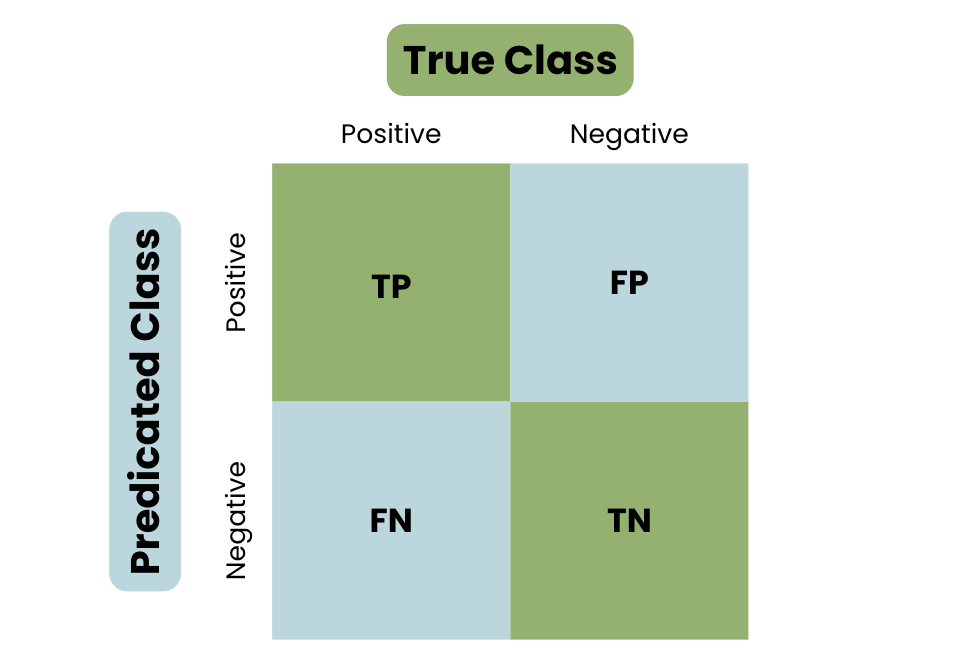



In [ ]:
import xgboost as xgb
params = {
    'objective': 'binary:logistic',
    'random_state': 42
}

# Initialize the XGBoost model
xgb = xgb.XGBClassifier(**params)
xgb.fit(X_train, y_train)

train_pred_xgb = xgb.predict(X_train)
test_pred_xgb = xgb.predict(X_test)

train_accuracy = accuracy_score(y_train, train_pred_xgb)
test_accuracy = accuracy_score(y_test, test_pred_xgb)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9808114035087719
Testing Accuracy: 0.9763168282092891


In [ ]:
xgb_train_acc=accuracy_score(y_train, train_pred_xgb)
xgb_test_acc=accuracy_score(y_test, test_pred_xgb)
xgb_train_rec=recall_score(y_train,train_pred_xgb)
xgb_test_rec=recall_score(y_test,test_pred_xgb)
xgb_train_pre=precision_score(y_train,train_pred_xgb)
xgb_test_pre=precision_score(y_test,test_pred_xgb)

print('Random Forest Performance')
print('---------------------------------------')
print(f'Training Accuracy: {xgb_train_acc*100:.2f}%')
print(f'Testing Accuracy: {xgb_test_acc*100:.2f}%')
print(f'Training Recall: {xgb_train_rec*100:.2f}%')
print(f'Testing Recall: {xgb_test_rec*100:.2f}%')
print(f'Training Precision: {xgb_train_pre*100:.2f}%')
print(f'Testing Precision: {xgb_test_pre*100:.2f}%')

Random Forest Performance
---------------------------------------
Training Accuracy: 98.08%
Testing Accuracy: 97.63%
Training Recall: 24.10%
Testing Recall: 7.68%
Training Precision: 97.87%
Testing Precision: 80.00%


In [ ]:
conf_matrix_train_xgb = confusion_matrix(y_train, train_pred_xgb)

# Calculate confusion matrix for test set
conf_matrix_test_xgb = confusion_matrix(y_test, test_pred_xgb)

print("Confusion Matrix for Training Set:")
print(conf_matrix_train_xgb)

print("\nConfusion Matrix for Test Set:")
print(conf_matrix_test_xgb)

Confusion Matrix for Training Set:
[[88898    12]
 [ 1738   552]]

Confusion Matrix for Test Set:
[[22217    11]
 [  529    44]]


We can see that the number of TN is much higher and the number of FN is much lower than before, so the gradient boosted tree method works much better for our data, which can be attributed to the high complexity and the absence of a very important feature in dataset 1.

In [ ]:
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],      # Learning rate
    'max_depth': [3, 5, 10, 12, 15],             # Maximum depth of each tree
    'n_estimators': [50, 100, 150, 500],         # Number of trees (boosting rounds)
    'random_state': [42]                         # Random state for reproducibility
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100,
                                   scoring='accuracy', cv=5, verbose=1, random_state=42, n_jobs=-1)

# Perform randomized search
random_search_xgb.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_xgb = random_search_xgb.best_params_
best_estimator_xgb = random_search_xgb.best_estimator_

# Make predictions on the testing data using the best estimator
test_pred_xgb_search = best_estimator_xgb.predict(X_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.



In [ ]:
# Calculate accuracy for testing data using the best estimator
test_accuracy_xgb = accuracy_score(y_test, test_pred_xgb_search)
test_precision_xgb = precision_score(y_test, test_pred_xgb_search)
test_recall_xgb = recall_score(y_test, test_pred_xgb_search)

print(f'Testing Accuracy: {test_accuracy_xgb*100:.2f}%')
print(f'Testing Recall: {test_recall_xgb*100:.2f}%')
print(f'Testing Precision: {test_precision_xgb*100:.2f}%')

Testing Accuracy: 98.19%
Testing Recall: 36.65%
Testing Precision: 80.77%


# Results

Both LogisticRegression and RandomForest were not effectively capturing trends in the data, resulting in high accuracy but very low recall and precision (< 0.05) due to high FN and low TN values
Using Gradient Boosted Trees resulted in much better results (recall = 0.13 and precision = 0.93)
After performing Randomized Search, the recall increased to 0.39 with a precision of 0.84 and accuracy of 0.98 for a model with max depth = 15 and eta = 0.1

# Conclusion and Discussion

### Dataset 1:
- **Genre Encoding Challenges:** Although encoding the genre category could potentially improve results, the presence of over 100 unique genres, some of which do not fit neatly into broader categories (e.g., 'anime'), makes this task complex.
- **Model Performance:** The XGBRegressor outperformed other models, likely due to its ability to handle the complexity and nuances of our data.
- **Model Fit:** Post-hyperparameter tuning, our model shows no significant signs of underfitting or overfitting, achieving a satisfactory R^2 of approximately 0.5 and an MSE of 233.

### Dataset 2:
- **Overall Model Performance:** All models demonstrated relatively low R^2 values, indicating limited explanatory power of the features over stream variability. The highest R^2 of 0.22 was observed with the GradientBoostingRegressor on the test set.
- **Comparative Analysis:** The GradientBoostingRegressor also showed potential overfitting, as evidenced by a high R^2 in the training set (0.59) compared to the test set. Both RandomForest and PCA performed modestly, with PCA potentially losing critical information due to dimensionality reduction.
- **Feature Importance:** Loudness and instrumentalness, along with the engineered feature 'vibe', were identified as significant predictors. This insight is crucial for future feature engineering and model refinement.
- **Hyperparameter Tuning:** Improvements in R^2 and MSE were modest following tuning, suggesting that further gains might require adjustments beyond the current feature set.

### Shared Feature Importance
- **Cross-Dataset Insights:** Loudness was a significant predictor in both datasets, underscoring its impact on song success across different contexts.

### Model Limitations
- **Data Completeness:** Many charting songs may not be present in Dataset 1, limiting the models' applicability to a subset of songs.
- **Correlation Challenges:** No features showed a distinct high correlation with popularity or streams, despite extensive feature engineering.
- **Parameter Tuning:** Due to the dataset's size, only Randomized Search was feasible. More exhaustive tuning, such as Grid Search, could potentially yield better results.

### Potential for Improvement

**1. Expanding Model Diversity:**
   - **Incorporating Additional Algorithms:** Future analyses could benefit from incorporating more diverse algorithms such as Support Vector Machines or Neural Networks, which might capture non-linear relationships more effectively.
   - **Ensemble Methods:** Exploring ensemble methods beyond gradient boosting, like stacking or blending different model predictions, could provide more robust predictions by leveraging the strengths of multiple learning algorithms.

**2. Enhanced Feature Engineering:**
   - **Temporal Features:** Adding time-related features such as seasonality or release timing could provide insights into trends that affect song popularity or streaming numbers.
   - **Sentiment Analysis:** For lyrical content available, performing sentiment analysis might reveal how the emotional content of lyrics correlates with song popularity or streaming frequency.

**3. Deeper Hyperparameter Optimization:**
   - **Advanced Techniques:** Utilizing more comprehensive search techniques such as Grid Search or Bayesian Optimization to fine-tune model parameters could potentially unlock higher model performance.
   - **Cross-Validation Strategies:** Implementing more robust cross-validation strategies, such as time-series splits or stratified folds, might provide a clearer understanding of model stability and effectiveness across different data segments.

**4. Data Augmentation:**
   - **Integrating Additional Data Sources:** Augmenting the datasets with additional data such as artist popularity metrics, social media influence, or promotional activities might provide a richer basis for predicting trends.
   - **Collaborative Filtering:** Employing techniques from recommendation systems, such as collaborative filtering, could help in understanding user behavior patterns that influence song streams and popularity.

### Key Takeaways
- **Model Efficacy:** Gradient boosting models consistently delivered superior performance, likely due to their robustness in handling complex datasets.
- **Predictive Difficulty:** Predicting the number of streams proved more challenging than predicting popularity, possibly due to the inherent differences between the engineered nature of popularity and the more direct measurement of streams.
- **Feature Variability:** The key features influencing popularity in Dataset 1 and charting success in Dataset 2 were largely different, with loudness being the notable exception.
- **Classification Performance:** The merged dataset classification showed high accuracy and precision, though recall was notably low at approximately 10%, indicating areas for future model improvement.

### Modeling Implications for Potential Stakeholders

**1. Music Producers and Artists:**
   - **Tailored Content Creation:** Insights from the model can guide artists and producers in creating content that aligns with current trends and audience preferences, potentially increasing the likelihood of chart success.
   - **Strategic Release Timing:** Understanding the impact of release timing on song popularity could help in planning optimal release schedules.

**2. Music Marketers and Promoters:**
   - **Targeted Marketing Strategies:** Knowing which features contribute most significantly to a song's success allows marketers to tailor promotional efforts that highlight these aspects, such as emphasizing the energy or danceability of a track.
   - **Geographic and Demographic Targeting:** Analysis of how songs perform across different regions and languages can inform more localized marketing strategies, maximizing engagement in key areas.

**3. Music Industry Analysts:**
   - **Market Trend Analysis:** Analysts can use the models, along with more timeseries data, to identify broader trends in music consumption, providing valuable reports and forecasts to industry stakeholders.
   - **Performance Benchmarking:** Insights on what factors influence streaming and popularity can help in benchmarking and comparing artists or tracks within the industry.

By focusing on these areas of potential improvement and considering the broader implications for stakeholders, this project can evolve into a more comprehensive tool for strategic decision-making in the music industry.